In [1]:
#IMPORT LIBRARIES

In [1]:
# To handle data
import pandas as pd
import numpy as np

# To visualize dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# Import iterative imputer
from sklearn.experimental import enable_iterative_imputer  # Must be imported before IterativeImputer
from sklearn.impute import IterativeImputer

# Machine learning utilities
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# For classification tasks, we use the following metrics
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix,  # Fixed the typo here
    classification_report, 
    roc_auc_score, 
    roc_curve, 
    auc
)

# Importing classification algorithms from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

#import warnings
import warnings
warnings.filterwarnings('ignore')


### LOAD THE DATASET

In [2]:
#load data
df=pd.read_csv('heart_disease_uci[1].csv')

In [3]:
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

## Exploratory Data Analysis(EDA)

### Explore each column!

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
df.shape

(920, 16)

### Id column!

In [7]:
df['id'].min() , df['id'].max()

(1, 920)

### Age column!

In [8]:
df['age'].min() , df['age'].max()

(28, 77)

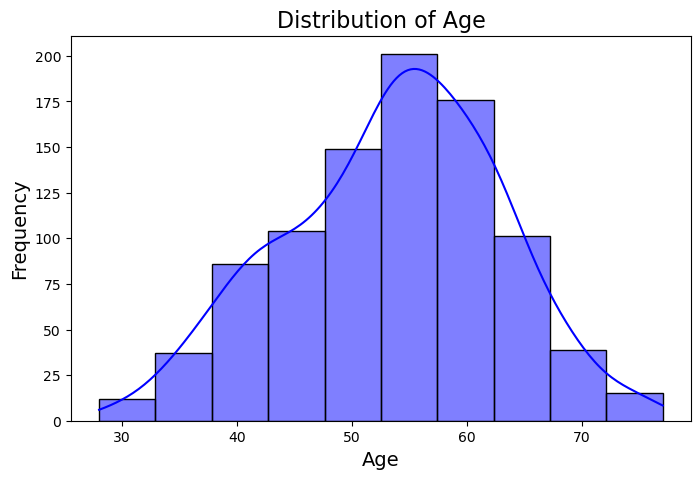

In [9]:
# Plot histogram using Seaborn to see distribution of age column
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=10, kde=True, color='blue')  # kde=True adds a kernel density estimate
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

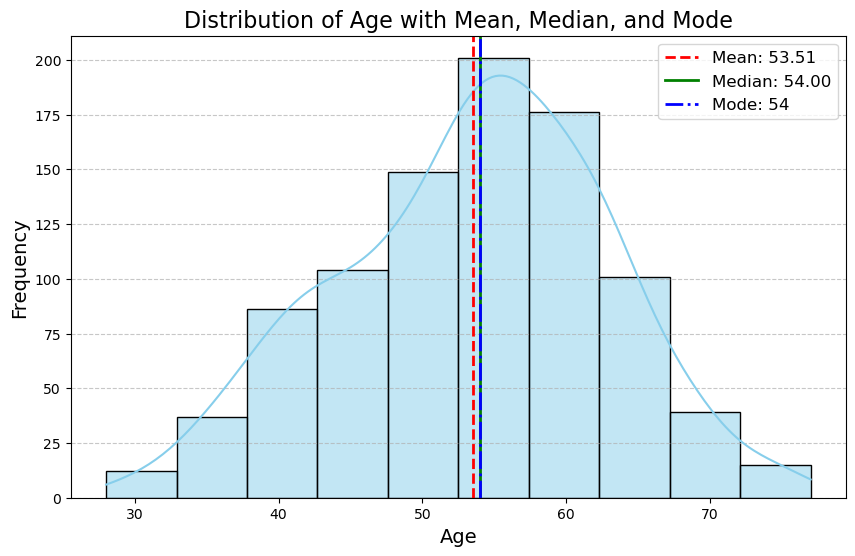

In [10]:
# Calculate mean, median, and mode
mean_age = df['age'].mean()
median_age = df['age'].median()
mode_age = df['age'].mode()[0]  # Mode can return multiple values; pick the first one

# Plot histogram with mean, median, and mode
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True, color='skyblue', edgecolor='black')

# Add vertical lines for mean, median, and mode
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='-', linewidth=2, label=f'Median: {median_age:.2f}')
plt.axvline(mode_age, color='blue', linestyle='-.', linewidth=2, label=f'Mode: {mode_age}')

# Add labels and legend
plt.title('Distribution of Age with Mean, Median, and Mode', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
print("Mean:", mean_age)
print("Median:" , median_age)
print("Mode:" , mode_age) 

Mean: 53.51086956521739
Median: 54.0
Mode: 54


In [12]:
#plot histogram of age column using plotly and coluring this by sex
# Create histogram with Plotly
fig = px.histogram(
    df,
    x="age",
    color="sex",
    nbins=15,  # Number of bins
    title="Distribution of Age Colored by Sex",
    labels={'age': 'Age', 'sex': 'Sex'},  # Axis labels
    template="plotly"
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Count",
    legend_title="Sex",
    bargap=0.5,  # Space between bars
)

# Show the plot
fig.show()

### --Most of the males and females got heart disease at the age of 54-55 years

In [13]:
# value count of age column grouping by sex column
#values of age column
df['age'].value_counts()


age
54    51
58    43
55    41
56    38
57    38
52    36
62    35
51    35
59    35
53    33
60    32
61    31
48    31
63    30
50    25
41    24
46    24
43    24
64    22
49    22
65    21
44    19
47    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
70     7
74     7
36     6
32     5
71     5
72     4
29     3
75     3
31     2
33     2
76     2
77     2
30     1
28     1
73     1
Name: count, dtype: int64

In [14]:
#values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [15]:
#calculate %age of male and female value counts
male_count = 726
female_count = 194
total_counts = male_count + female_count
#calculate %age
male= (male_count / total_counts) * 100
female= (female_count / total_counts) * 100
#display result of data
print(f"Male percentage in the data is: {male:.2f}%")
print(f"Female percentage in the data is: {female:.2f}%")
#difference
difference = (male_count - female_count) / female_count * 100
print(f"Males are {difference:.2f}% more than female in the data.")


Male percentage in the data is: 78.91%
Female percentage in the data is: 21.09%
Males are 274.23% more than female in the data.


In [16]:
# Value counts of age column grouped by sex
grouped_counts = df.groupby('sex')['age'].value_counts()

# Display the result
print(grouped_counts)


sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64


### Let's deal with dataset	column

In [17]:
#find unique vale count in the dataset
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

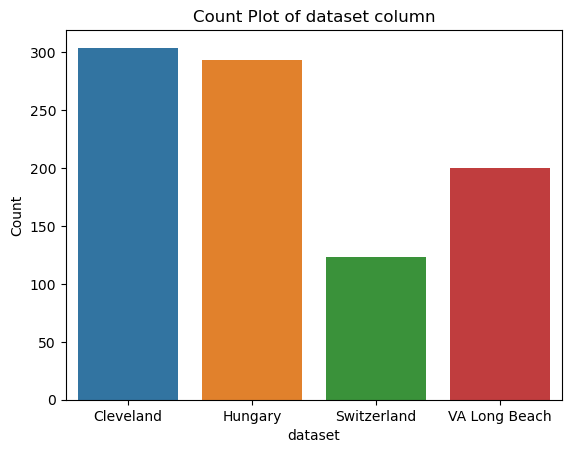

In [18]:
# Create a count plot
sns.countplot(x='dataset', data=df)

# Customize the plot
plt.title('Count Plot of dataset column')
plt.xlabel('dataset')
plt.ylabel('Count')

# Show the plot
plt.show()

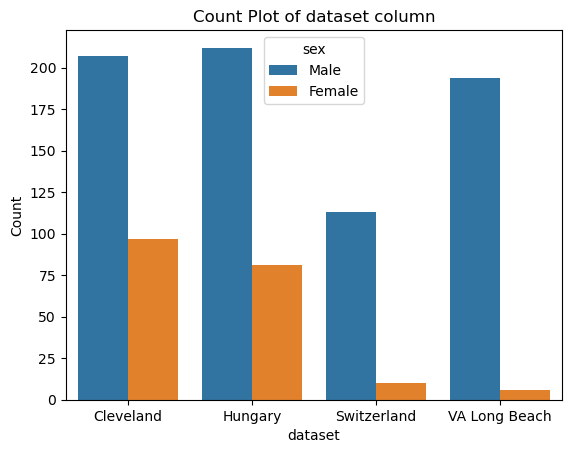

In [19]:
# Create a count plot
sns.countplot(x='dataset', data=df , hue='sex')

# Customize the plot
plt.title('Count Plot of dataset column')
plt.xlabel('dataset')
plt.ylabel('Count')

# Show the plot
plt.show()

In [20]:
#Create a plotly plot
fig = px.histogram(df, x='dataset', color='sex', 
                   title='Count Plot of dataset column',
                   labels={'dataset': 'Dataset', 'sex': 'Sex'},
                   barmode='group')  # Use 'group' for side-by-side bars

# Show the plot
fig.show()

In [21]:
df.groupby('sex')['dataset'].value_counts()


sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [22]:
#make a plot of age column plotly and coluring them by dataset column
#scatterplot
fig = px.scatter(df, x='age', color='dataset',
                 title='Age Column Colored by Dataset',
                 labels={'age': 'Age', 'dataset': 'Dataset'})

# Show the plot
fig.show()

In [23]:
#Histogram (if you want counts for age):
fig = px.histogram(df, x='age', color='dataset',
                   title='Age Distribution Colored by Dataset',
                   labels={'age': 'Age', 'dataset': 'Dataset'},
                   barmode='group')  # Side-by-side bars for each dataset category

# Show the plot
fig.show()


In [24]:
# Calculate mean, median, and mode grouped by 'dataset'
mean_age = df.groupby('dataset')['age'].mean()
median_age = df.groupby('dataset')['age'].median()
mode_age = df.groupby('dataset')['age'].agg(lambda x: x.mode().iloc[0])  # Get the first mode in case of multiple

# Print results
print("Mean Age by Dataset:")
print(mean_age)

print("\nMedian Age by Dataset:")
print(median_age)

print("\nMode Age by Dataset:")
print(mode_age)

Mean Age by Dataset:
dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64

Median Age by Dataset:
dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64

Mode Age by Dataset:
dataset
Cleveland        58
Hungary          54
Switzerland      61
VA Long Beach    62
Name: age, dtype: int64


### Let's discuss cp column

In [25]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

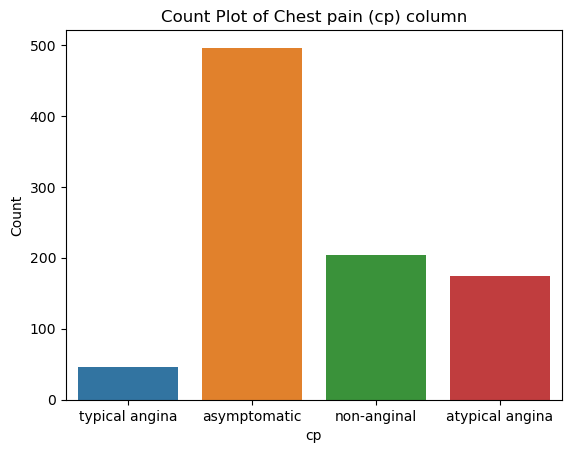

In [26]:
# Create a count plot
sns.countplot(x='cp', data=df)

# Customize the plot
plt.title('Count Plot of Chest pain (cp) column')
plt.xlabel('cp')
plt.ylabel('Count')

# Show the plot
plt.show()

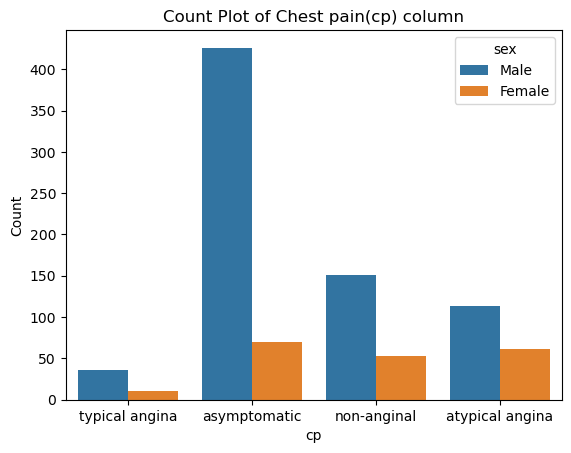

In [27]:
# Create a count plot
sns.countplot(x='cp', data=df , hue='sex')

# Customize the plot
plt.title('Count Plot of Chest pain(cp) column')
plt.xlabel('cp')
plt.ylabel('Count')

# Show the plot
plt.show()

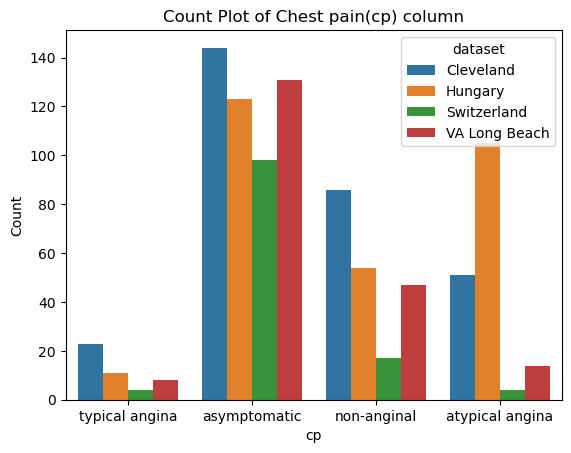

In [33]:
#countplot of cp column by dataset column
# Create a count plot
sns.countplot(x='cp', data=df , hue='dataset')

# Customize the plot
plt.title('Count Plot of Chest pain(cp) column')
plt.xlabel('cp')
plt.ylabel('Count')

# Show the plot
plt.show()

In [28]:
#Create a plotly plot
fig = px.histogram(df, x='cp', color='sex', 
                   title='Count Plot of CP column',
                   labels={'cp': 'Cp', 'sex': 'Sex'},
                   barmode='group')  # Use 'group' for side-by-side bars

# Show the plot
fig.show()

In [29]:
#Histogram (if you want counts for cp):
fig = px.histogram(df, x='cp', color='sex',
                   title='Chest Pain Distribution Colored by Sex',
                   labels={'cp': 'Cp', 'sex': 'Sex'},
                   barmode='group')  # Side-by-side bars for each dataset category

# Show the plot
fig.show()


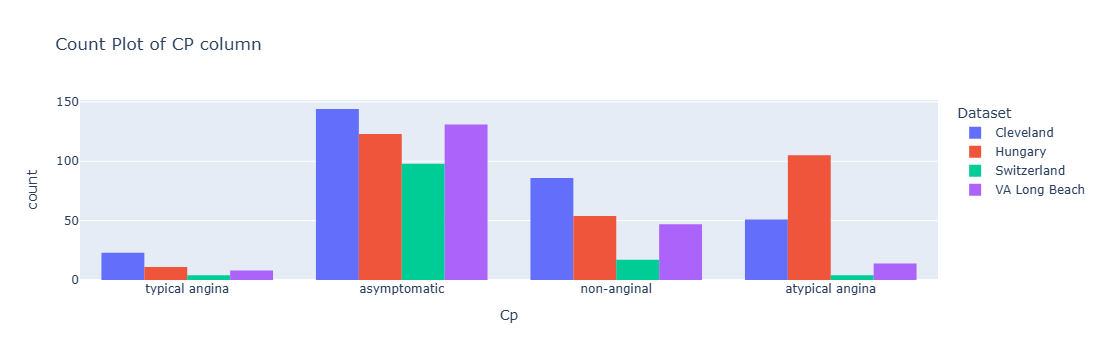

In [34]:
#Create a plotly plot
fig = px.histogram(df, x='cp', color='dataset', 
                   title='Count Plot of CP column',
                   labels={'cp': 'Cp', 'dataset': 'Dataset'},
                   barmode='group')  # Use 'group' for side-by-side bars

# Show the plot
fig.show()

In [30]:
#draw plot of age column grouped by cp column using plotly

#Box Plot (to compare distributions):
fig = px.box(df, x='cp', y='age', title='Age Distribution Grouped by CP',
             labels={'cp': 'CP', 'age': 'Age'}, 
             color='cp')  # Add color for differentiation

# Show the plot
fig.show()


In [31]:
#Histogram (to compare distributions):
fig = px.histogram(df, x='age', color='cp',
                   title='Age Distribution Grouped by CP',
                   labels={'age': 'Age', 'cp': 'CP'},
                   barmode='group')  # Group bars by 'cp'

# Show the plot
fig.show()

In [32]:
#Scatter Plot (for individual data points):
fig = px.scatter(df, x='cp', y='age', color='cp', 
                 title='Age vs CP Scatter Plot',
                 labels={'cp': 'CP', 'age': 'Age'})

# Show the plot
fig.show()


### Let's explore trestbps(resting blood pressure ) column:

##### A normal resting blood pressure for most adults is 120/80 millimeters of mercury (mmHg) or lower. This is when the systolic pressure is less than 120 and the diastolic pressure is less than 80. 

In [35]:
df['trestbps'].value_counts()

trestbps
120.0    131
130.0    115
140.0    102
110.0     59
150.0     56
        ... 
164.0      1
101.0      1
174.0      1
192.0      1
127.0      1
Name: count, Length: 61, dtype: int64

In [38]:
df['trestbps'].isnull().sum()

59

In [39]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

##### Here as we can see count is 861 and our total is 920 , so there are missing values
##### 920-861 = 59

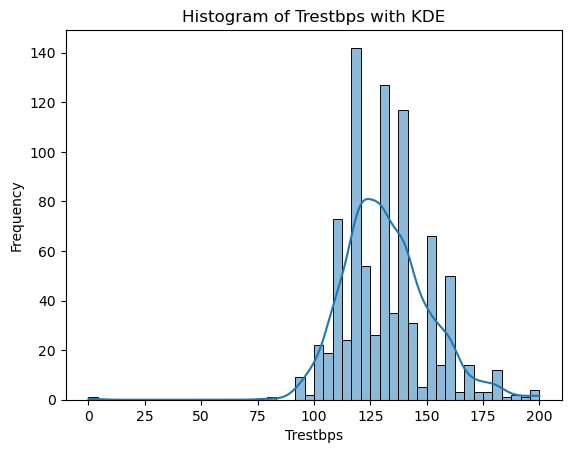

In [42]:
#create histplot of trestbps column

sns.histplot(data=df, x='trestbps', kde=True)

# Customize the plot
plt.title('Histogram of Trestbps with KDE')
plt.xlabel('Trestbps')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [46]:
# Calculate the percentage of missing values in the 'trestbps' column
missing_percentage = df['trestbps'].isnull().mean() * 100

# Display the result rounded to two decimal places
print(f"Percentage of missing values in 'trestbps': {missing_percentage:.2f}%")


Percentage of missing values in 'trestbps': 6.41%


In [122]:
# Create an IterativeImputer object
iterative_imputer = IterativeImputer(max_iter=10, random_state=42)

# Fit the imputer on the data
iterative_imputer.fit(df[['trestbps']])

# Transform the data to impute missing values|
df[['trestbps']] = iterative_imputer.transform(df[['trestbps']])

# Check if missing values are imputed
print("Missing values in 'trestbps' column after imputation:", df['trestbps'].isnull().sum())

Missing values in 'trestbps' column after imputation: 0


In [126]:
#Let's impute other columns with missing values


In [136]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Specify numeric columns
numeric_columns = ['slope', 'fbs', 'exang']

# Create and apply the IterativeImputer
iterative_imputer = IterativeImputer(max_iter=10, random_state=42)
df[numeric_columns] = iterative_imputer.fit_transform(df[numeric_columns])


### impute chol column missing values using iterative imputer


In [123]:
# Create an IterativeImputer object
iterative_imputer = IterativeImputer(max_iter=10, random_state=42)

# Fit the imputer on the data
iterative_imputer.fit(df[['chol']])

# Transform the data to impute missing values
df[['chol']] = iterative_imputer.transform(df[['chol']])

# Check if missing values are imputed
print("Missing values in 'chol' column after imputation:", df['chol'].isnull().sum())

Missing values in 'chol' column after imputation: 0


### Impute thalch column missing values using iterative imputer¶

In [124]:
# Create an IterativeImputer object
iterative_imputer = IterativeImputer(max_iter=10, random_state=42)

# Fit the imputer on the data (column 'thalch')
iterative_imputer.fit(df[['thalch']])

# Transform the data to impute missing values
df[['thalch']] = iterative_imputer.transform(df[['thalch']])

# Check if missing values are imputed
print("Missing values in 'thalch' column after imputation:", df['thalch'].isnull().sum())

Missing values in 'thalch' column after imputation: 0


### Impute oldpeak column missing values using iterative imputer¶¶

In [125]:
# Create an IterativeImputer object
iterative_imputer = IterativeImputer(max_iter=10, random_state=42)

# Fit the imputer on the data (column 'thalch')
iterative_imputer.fit(df[['oldpeak']])

# Transform the data to impute missing values
df[['oldpeak']] = iterative_imputer.transform(df[['oldpeak']])

# Check if missing values are imputed
print("Missing values in 'oldpeak' column after imputation:", df['oldpeak'].isnull().sum())

Missing values in 'oldpeak' column after imputation: 0


### Impute ca column missing values using iterative imputer¶

In [128]:
# Create an IterativeImputer object
iterative_imputer = IterativeImputer(max_iter=10, random_state=42)

# Fit the imputer on the data (column 'ca')
iterative_imputer.fit(df[['ca']])

# Transform the data to impute missing values
df[['ca']] = iterative_imputer.transform(df[['ca']])

# Check if missing values are imputed
print("Missing values in 'ca' column after imputation:", df['ca'].isnull().sum())

Missing values in 'ca' column after imputation: 0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     611 non-null    object 
 13  ca        920 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [57]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
ca           0.000000
num          0.000000
dtype: float64

In [58]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [59]:
df['thal'].value_counts().sum() 

434

### Let's impute missing values of thal (thelesimia) , slope , fbs, exang , restecg column using ML Model.
##### Here we are going to use RANDOM FOREST CLASSIFIER to impute missing vales of all these categorical columns.

In [66]:
def impute_with_random_forest(df, column):
    """
    Imputes missing values in a categorical column using Random Forest Classifier.

    Parameters:
    df (pd.DataFrame): The dataset containing missing values.
    column (str): The name of the categorical column to impute.

    Returns:
    pd.DataFrame: DataFrame with the missing values in the specified column imputed.
    """
    print(f"Starting imputation for column: {column}")

    # Ensure the column is categorical
    if not pd.api.types.is_categorical_dtype(df[column]):
        df[column] = df[column].astype('category')

    # Separate rows with and without missing values
    missing_rows = df[df[column].isnull()]
    complete_rows = df[df[column].notnull()]

    # Debug: Print missing values count
    print(f"DEBUG: Missing values in '{column}': {df[column].isnull().sum()}")

    # Check if there are missing values to impute
    if missing_rows.empty:
        print(f"No missing values found in column: {column}")
        return df

    # Prepare data for training
    X_complete = complete_rows.drop(columns=[column])
    y_complete = complete_rows[column]

    # Debug: Print shapes of X_complete and y_complete
    print(f"DEBUG: X_complete shape: {X_complete.shape}")
    print(f"DEBUG: y_complete shape: {y_complete.shape}")

    # Handle categorical variables (convert to numeric for Random Forest)
    X_complete = pd.get_dummies(X_complete, drop_first=True)
    X_missing = pd.get_dummies(missing_rows.drop(columns=[column]), drop_first=True)

    # Align columns (ensure compatibility between train and test data)
    X_missing = X_missing.reindex(columns=X_complete.columns, fill_value=0)

    # Train-test split for evaluation (optional)
    X_train, X_test, y_train, y_test = train_test_split(X_complete, y_complete, test_size=0.2, random_state=42)

    # Initialize and train Random Forest Classifier
    rf = RandomForestClassifier(random_state=42, n_estimators=100)
    rf.fit(X_train, y_train)

    # Evaluate accuracy (optional)
    y_pred = rf.predict(X_test)
    print(f"Accuracy for imputation model on column '{column}': {accuracy_score(y_test, y_pred):.2f}")

    # Predict missing values
    missing_predictions = rf.predict(X_missing)

    # Debug: Check predicted values
    print(f"DEBUG: Predicted values: {missing_predictions}")

    # Combine existing categories and predictions, ensuring they are unique
    new_categories = pd.unique(
        pd.concat([pd.Series(df[column].cat.categories), pd.Series(missing_predictions)])
    )
    df[column] = df[column].cat.set_categories(new_categories)

    # Impute missing values
    df.loc[df[column].isnull(), column] = missing_predictions

    print(f"Imputation complete for column: {column}")
    return df


In [67]:
#Using the function to impute all these categorical columns
columns_to_impute = ['thal', 'slope', 'fbs', 'exang', 'restecg']
for col in columns_to_impute:
    df = impute_with_random_forest(df, col)


Starting imputation for column: thal
DEBUG: Missing values in 'thal': 0
No missing values found in column: thal
Starting imputation for column: slope
DEBUG: Missing values in 'slope': 0
No missing values found in column: slope
Starting imputation for column: fbs
DEBUG: Missing values in 'fbs': 90
DEBUG: X_complete shape: (830, 15)
DEBUG: y_complete shape: (830,)
Accuracy for imputation model on column 'fbs': 0.80
DEBUG: Predicted values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Imputation complete for column: fbs
Starting imputation for column: exang
DEBUG: Missing values in 'exang': 55
DEBUG: X_complete shape: (865, 15)
DEBUG: y_complete shape: (865,)
Accuracy for imputation model on column 'exang': 0.77
DEBUG: Predicted values: [0. 1. 1. 0. 1. 1. 1. 1. 1

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        920 non-null    int64   
 1   age       920 non-null    int64   
 2   sex       920 non-null    object  
 3   dataset   920 non-null    object  
 4   cp        920 non-null    object  
 5   trestbps  920 non-null    float64 
 6   chol      920 non-null    float64 
 7   fbs       920 non-null    category
 8   restecg   920 non-null    category
 9   thalch    920 non-null    float64 
 10  exang     920 non-null    category
 11  oldpeak   920 non-null    float64 
 12  slope     920 non-null    category
 13  ca        920 non-null    float64 
 14  thal      920 non-null    category
 15  num       920 non-null    int64   
dtypes: category(5), float64(5), int64(3), object(3)
memory usage: 84.3+ KB


In [69]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

#### --Hence we imputed of all the missing values of numerical and categorical columns.

### Let's deal with the outliers!

In [70]:
# Get all numeric columns
numeric_columns_in_df = df.select_dtypes(include=['number']).columns
print(numeric_columns_in_df)


Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')


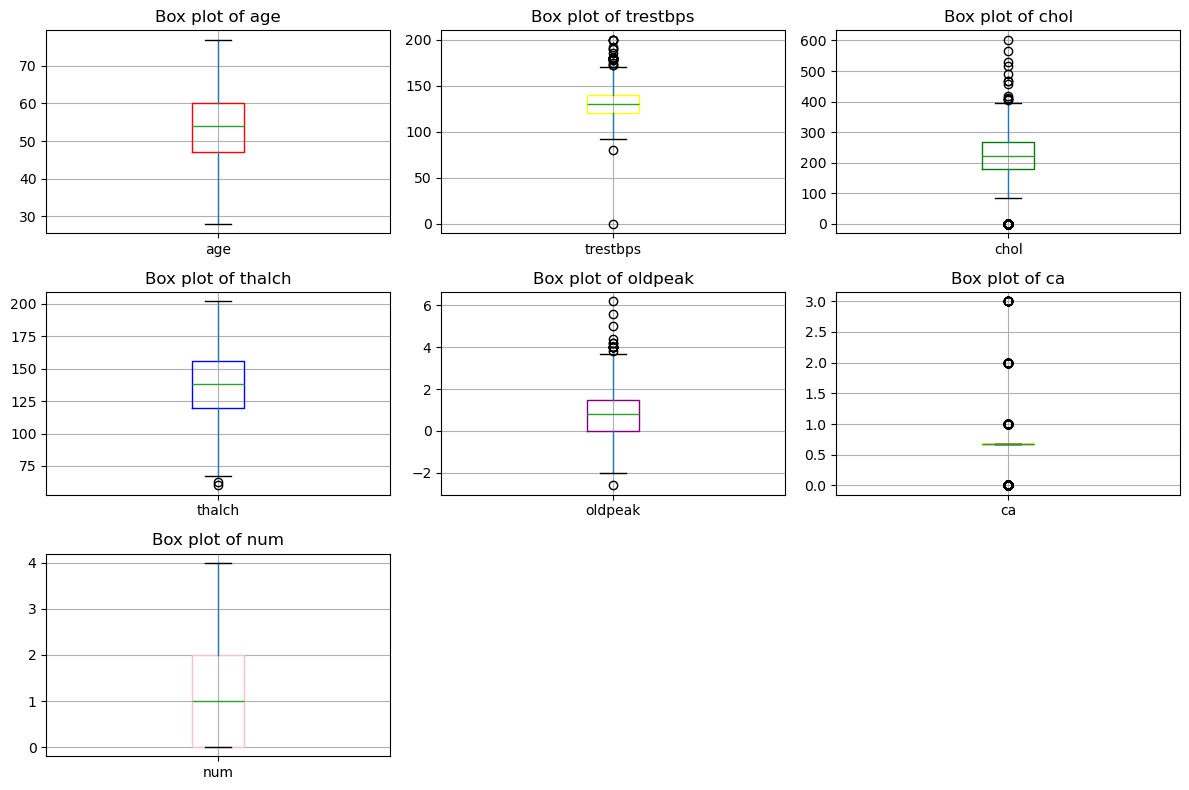

In [74]:
# Numeric columns for plotting
numeric_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

# Color list for box plots
colors = ['red', 'yellow', 'green', 'blue', 'purple', 'orange', 'pink']

# Plot box plots for each numeric column
plt.figure(figsize=(12, 8))  # Increase the figure size to accommodate more subplots
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid to fit 7 subplots
    df.boxplot(column=column, boxprops=dict(color=colors[i]))  # Set color for the box
    plt.title(f'Box plot of {column}')
    plt.tight_layout()  # Adjust spacing between plots

plt.show()

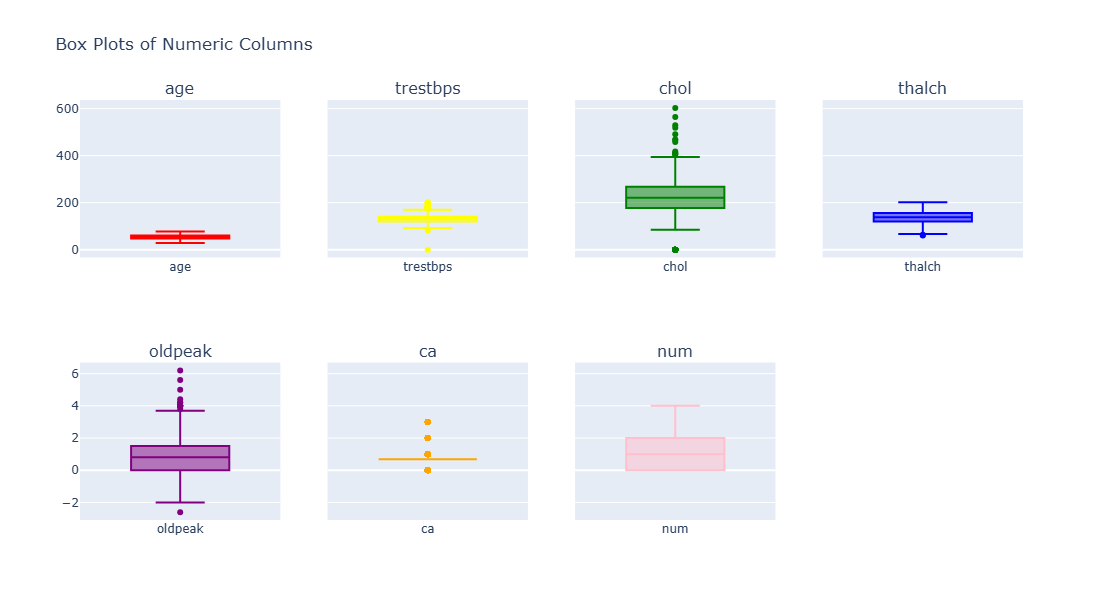

In [77]:
## make the same plots with plotly

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Numeric columns for plotting
numeric_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

# Color list for box plots
colors = ['red', 'yellow', 'green', 'blue', 'purple', 'orange', 'pink']

# Create a subplot layout (2 rows, 4 columns) to fit 7 subplots
fig = make_subplots(
    rows=2, cols=4,
    subplot_titles=numeric_columns,
    shared_yaxes=True,  # Share y-axis to compare distributions
)

# Plot each box plot in the respective subplot
for i, column in enumerate(numeric_columns):
    row = i // 4 + 1  # Determine row for the plot
    col = i % 4 + 1   # Determine column for the plot
    
    fig.add_trace(
        go.Box(
            y=df[column],  # Data for the box plot
            name=column,  # Name of the column for legend
            marker_color=colors[i],  # Set color for each box plot
        ),
        row=row, col=col  # Position in the subplot grid
    )

# Update layout for titles and axes
fig.update_layout(
    title="Box Plots of Numeric Columns",
    showlegend=False,  # Disable legend
    height=600,  # Adjust height of the figure
    width=1000,  # Adjust width of the figure
)

# Show the plot
fig.show()


In [78]:
#print rows from dataset df where trestbps == 0
df[df['trestbps']==0]

id  age   sex        dataset           cp  trestbps  chol  fbs restecg  \
753  754   55  Male  VA Long Beach  non-anginal       0.0   0.0  0.0  normal   

     thalch exang  oldpeak slope        ca               thal  num  
753   155.0   0.0      1.5  flat  0.676375  reversable defect    3

In [79]:
#--Here we can see this is an outlier
# so we will remove this row from data;

df=df[df['trestbps']!=0]

In [81]:
df.info()  # here we can see in the output that one outlier is removed  
#now total rows are 919 from 920

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        919 non-null    int64   
 1   age       919 non-null    int64   
 2   sex       919 non-null    object  
 3   dataset   919 non-null    object  
 4   cp        919 non-null    object  
 5   trestbps  919 non-null    float64 
 6   chol      919 non-null    float64 
 7   fbs       919 non-null    category
 8   restecg   919 non-null    category
 9   thalch    919 non-null    float64 
 10  exang     919 non-null    category
 11  oldpeak   919 non-null    float64 
 12  slope     919 non-null    category
 13  ca        919 non-null    float64 
 14  thal      919 non-null    category
 15  num       919 non-null    int64   
dtypes: category(5), float64(5), int64(3), object(3)
memory usage: 91.3+ KB


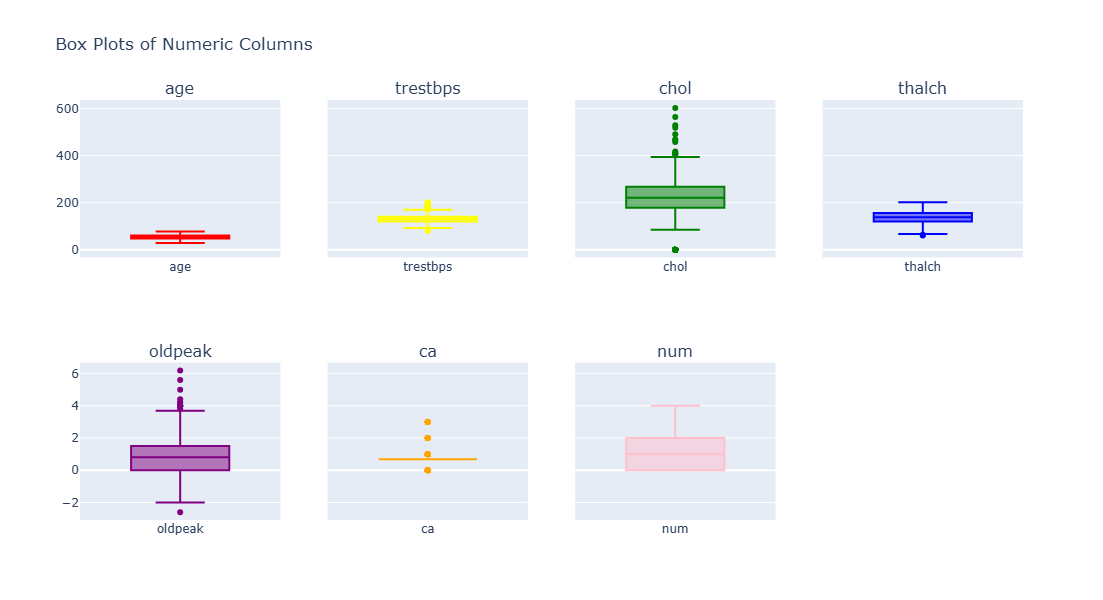

In [83]:
## make the same plots with plotly after removing one outlier


# Numeric columns for plotting
numeric_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

# Color list for box plots
colors = ['red', 'yellow', 'green', 'blue', 'purple', 'orange', 'pink']

# Create a subplot layout (2 rows, 4 columns) to fit 7 subplots
fig = make_subplots(
    rows=2, cols=4,
    subplot_titles=numeric_columns,
    shared_yaxes=True,  # Share y-axis to compare distributions
)

# Plot each box plot in the respective subplot
for i, column in enumerate(numeric_columns):
    row = i // 4 + 1  # Determine row for the plot
    col = i % 4 + 1   # Determine column for the plot
    
    fig.add_trace(
        go.Box(
            y=df[column],  # Data for the box plot
            name=column,  # Name of the column for legend
            marker_color=colors[i],  # Set color for each box plot
        ),
         row=row, col=col  # Position in the subplot grid
    )

# Update layout for titles and axes
fig.update_layout(
    title="Box Plots of Numeric Columns",
    showlegend=False,  # Disable legend
    height=600,  # Adjust height of the figure
    width=1000,  # Adjust width of the figure
)

# Show the plot
fig.show()


In [84]:
#print rows from dataset df where chol== 0
df[df['chol']==0]

id  age     sex        dataset              cp    trestbps  chol  fbs  \
597  598   32    Male    Switzerland  typical angina   95.000000   0.0  0.0   
598  599   34    Male    Switzerland    asymptomatic  115.000000   0.0  0.0   
599  600   35    Male    Switzerland    asymptomatic  132.132404   0.0  0.0   
600  601   36    Male    Switzerland    asymptomatic  110.000000   0.0  0.0   
601  602   38  Female    Switzerland    asymptomatic  105.000000   0.0  0.0   
..   ...  ...     ...            ...             ...         ...   ...  ...   
818  819   43    Male  VA Long Beach    asymptomatic  122.000000   0.0  0.0   
819  820   63    Male  VA Long Beach     non-anginal  130.000000   0.0  1.0   
822  823   48    Male  VA Long Beach     non-anginal  102.000000   0.0  0.0   
839  840   56    Male  VA Long Beach    asymptomatic  132.132404   0.0  0.0   
840  841   62    Male  VA Long Beach     non-anginal  132.132404   0.0  1.0   

              restecg      thalch exang   oldpeak        slope        ca  \
597            normal  127.000000   0.0  0.700000    upsloping  0.676375   
598            normal  154.000000   0.0  0.200000    upsloping  0.676375   
599            normal  130.000000   1.0  0.878788         flat  0.676375   
600            normal  125.000000   1.0  1.000000         flat  0.676375   
601            normal  166.000000   0.0  2.800000    upsloping  0.676375   
..                ...         ...   ...       ...          ...       ...   
818            normal  120.000000   0.0  0.500000    upsloping  0.676375   
819  st-t abnormality  160.000000   0.0  3.000000         flat  0.676375   
822  st-t abnormality  110.000000   1.0  1.000000  downsloping  0.676375   
839    lv hypertrophy  137.545665   1.0  0.878788         flat  0.676375   
840  st-t abnormality  137.545665   0.0  0.878788         flat  0.676375   

                  thal  num  
597  reversable defect    1  
598             normal    1  
599  reversable defect    3  
600       fixed defect    1  
601             normal    2  
..                 ...  ...  
818  reversable defect    1  
819       fixed defect    0  
822  reversable defect    1  
839  reversable defect    1  
840       fixed defect    2  

[171 rows x 16 columns]

In [85]:
df.head(2)

id  age   sex    dataset              cp  trestbps   chol  fbs  \
0   1   63  Male  Cleveland  typical angina     145.0  233.0  1.0   
1   2   67  Male  Cleveland    asymptomatic     160.0  286.0  0.0   

          restecg  thalch exang  oldpeak        slope   ca          thal  num  
0  lv hypertrophy   150.0   0.0      2.3  downsloping  0.0  fixed defect    0  
1  lv hypertrophy   108.0   1.0      1.5         flat  3.0        normal    2

#### Again explore trestbps(resting blood pressure ) column:

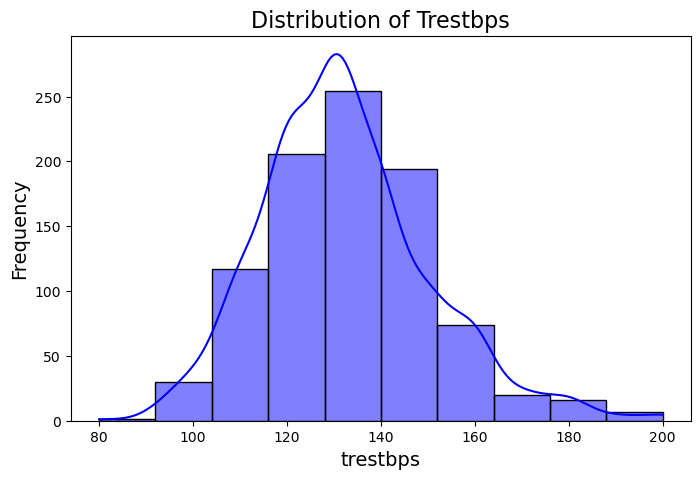

In [86]:
# Plot histogram using Seaborn to see distribution of trestbps column
plt.figure(figsize=(8, 5))
sns.histplot(df['trestbps'], bins=10, kde=True, color='blue')  # kde=True adds a kernel density estimate
plt.title('Distribution of Trestbps', fontsize=16)
plt.xlabel('trestbps', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

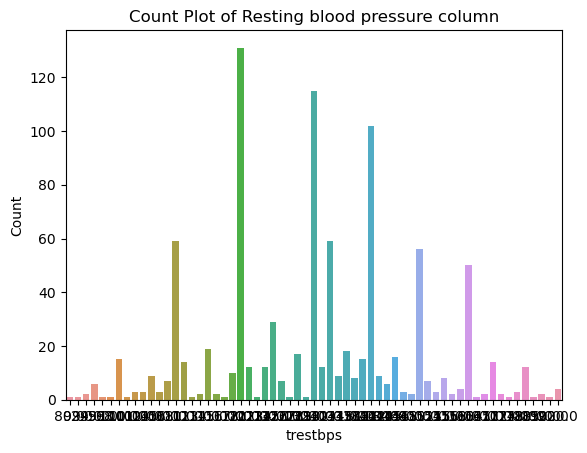

In [87]:

# Create a count plot
sns.countplot(x='trestbps', data=df)

# Customize the plot
plt.title('Count Plot of Resting blood pressure column')
plt.xlabel('trestbps')
plt.ylabel('Count')

# Show the plot
plt.show()


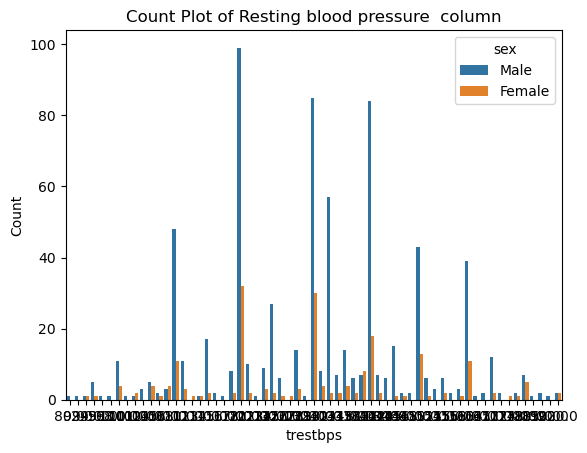

In [88]:
# Create a count plot
sns.countplot(x='trestbps', data=df , hue='sex')

# Customize the plot
plt.title('Count Plot of Resting blood pressure  column')
plt.xlabel('trestbps')
plt.ylabel('Count')

# Show the plot
plt.show()



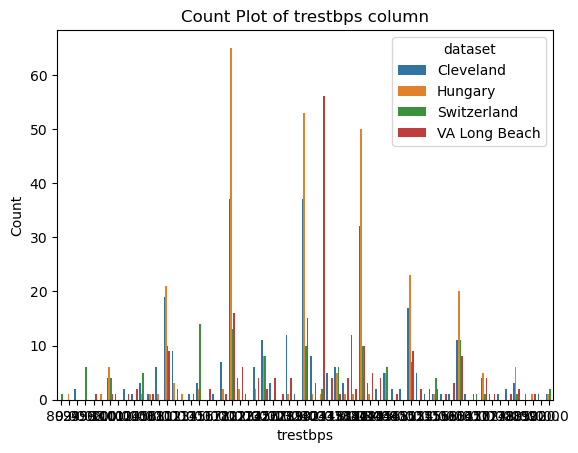

In [89]:
#countplot of trestbps column by dataset column
# Create a count plot
sns.countplot(x='trestbps', data=df , hue='dataset')

# Customize the plot
plt.title('Count Plot of trestbps column')
plt.xlabel('trestbps')
plt.ylabel('Count')

# Show the plot
plt.show()

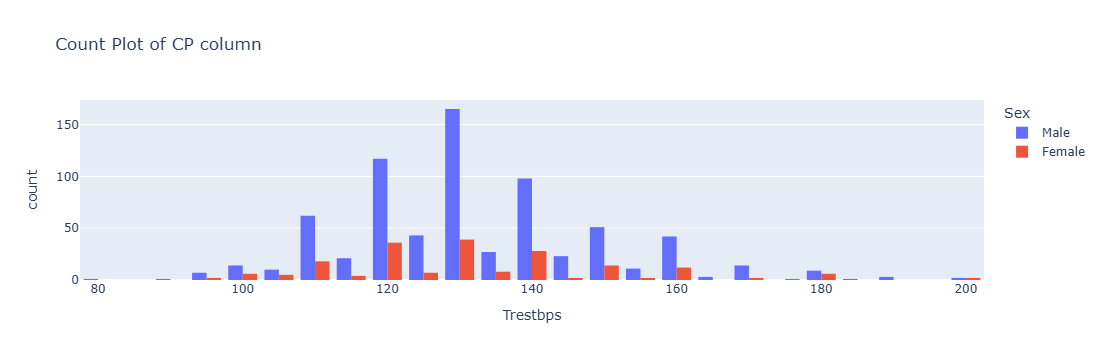

In [91]:
#Create a plotly plot
fig = px.histogram(df, x='trestbps', color='sex', 
                   title='Count Plot of CP column',
                   labels={'trestbps': 'Trestbps', 'sex': 'Sex'},
                   barmode='group')  # Use 'group' for side-by-side bars

# Show the plot
fig.show()



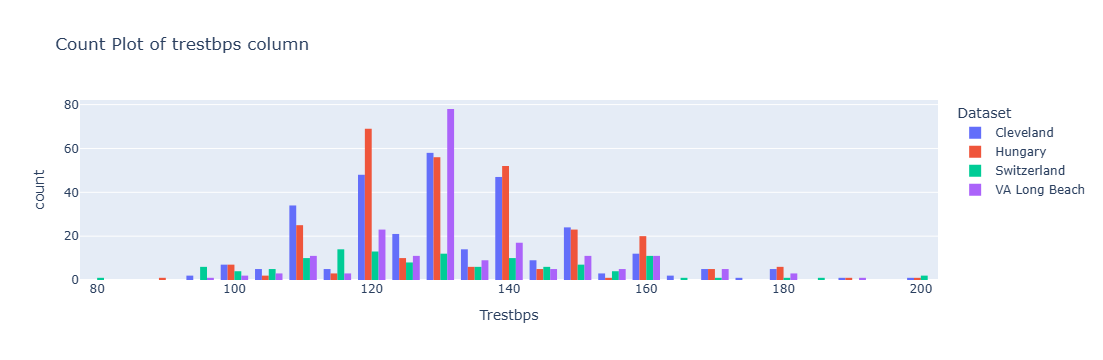

In [92]:
#Create a plotly plot
fig = px.histogram(df, x='trestbps', color='dataset', 
                   title='Count Plot of trestbps column',
                   labels={'trestbps': 'Trestbps', 'dataset': 'Dataset'},
                   barmode='group')  # Use 'group' for side-by-side bars

# Show the plot
fig.show()


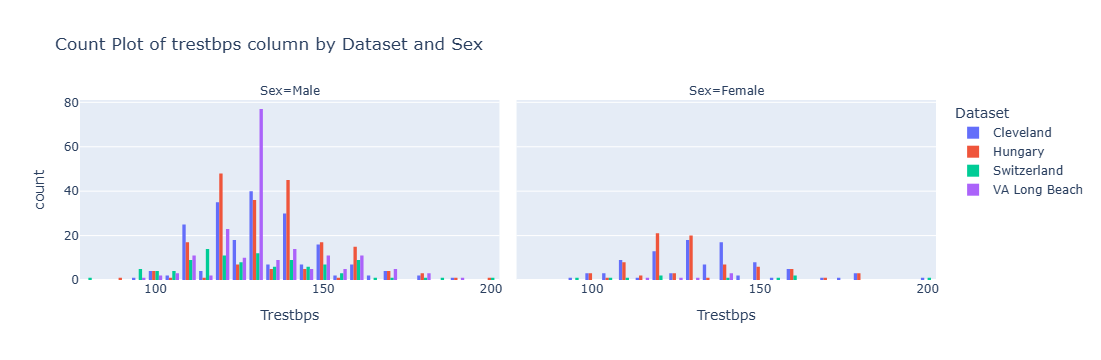

In [94]:
# Create a Plotly plot for 'trestbps' column with color='dataset' and facet_col='sex'
fig = px.histogram(
    df, 
    x='trestbps', 
    color='dataset', 
    title='Count Plot of trestbps column by Dataset and Sex',
    labels={'trestbps': 'Trestbps', 'dataset': 'Dataset', 'sex': 'Sex'},
    barmode='group',  # Use 'group' for side-by-side bars
    facet_col='sex'   # Create separate plots for each 'sex' value
)

# Show the plot
fig.show()

### Let's explore rest of all the columns by creating funtion:
#### - Here we create seaborne and Plotly plots

In [95]:
# List of columns to explore
columns_to_plot = ['chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# Loop through each column and create Seaborn and Plotly plots
for col in columns_to_plot:
    # Plot histogram using Seaborn to see distribution of trestbps column
    plt.figure(figsize=(8, 5))
    sns.histplot(df['col'], bins=10, kde=True, color='blue')  # kde=True adds a kernel density estimate
    plt.title('Distribution of col:', fontsize=16)
    plt.xlabel('col', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()
    
    # 1. Seaborn Count Plot without Hue
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col} column')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    
    # 2. Seaborn Count Plot with Hue='sex'
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, hue='sex')
    plt.title(f'Count Plot of {col} column by Sex')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    
    # 3. Seaborn Count Plot with Hue='dataset'
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, hue='dataset')
    plt.title(f'Count Plot of {col} column by Dataset')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    # 4. Plotly Histogram with Color='sex'
    fig = px.histogram(df, x=col, color='sex', 
                       title=f'Count Plot of {col} column by Sex',
                       labels={col: col, 'sex': 'Sex'},
                       barmode='group')  # Use 'group' for side-by-side bars
    fig.show()

    # 5. Plotly Histogram with Color='dataset'
    fig = px.histogram(df, x=col, color='dataset', 
                       title=f'Count Plot of {col} column by Dataset',
                       labels={col: col, 'dataset': 'Dataset'},
                       barmode='group')  # Use 'group' for side-by-side bars
    fig.show()

   # 6.Create a Plotly plot for x=colcolumn with color='dataset' and facet_col='sex'
    fig = px.histogram(
    df, 
    x='col', 
    color='dataset', 
    title='Count Plot of trestbps column by Dataset and Sex',
    labels={'trestbps': 'Trestbps', 'dataset': 'Dataset', 'sex': 'Sex'},
    barmode='group',  # Use 'group' for side-by-side bars
    facet_col='sex'   # Create separate plots for each 'sex' value
    )

   # Show the plot
    fig.show()

KeyError: 'col'

<Figure size 800x500 with 0 Axes>

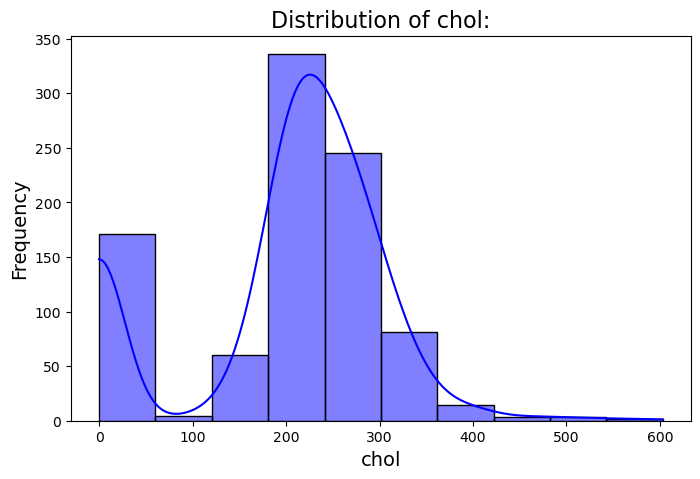

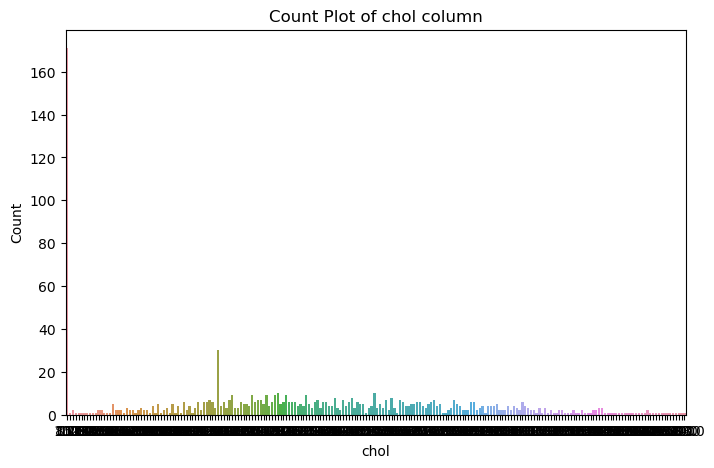

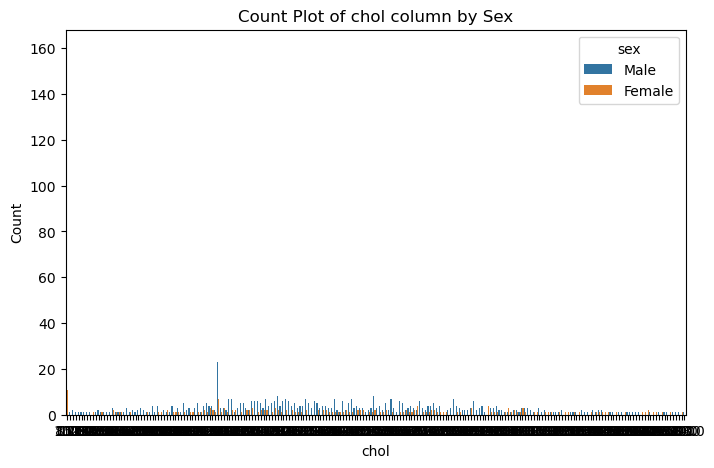

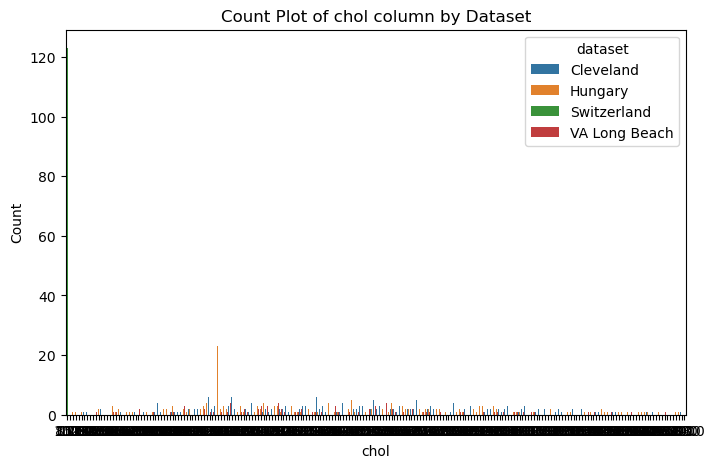

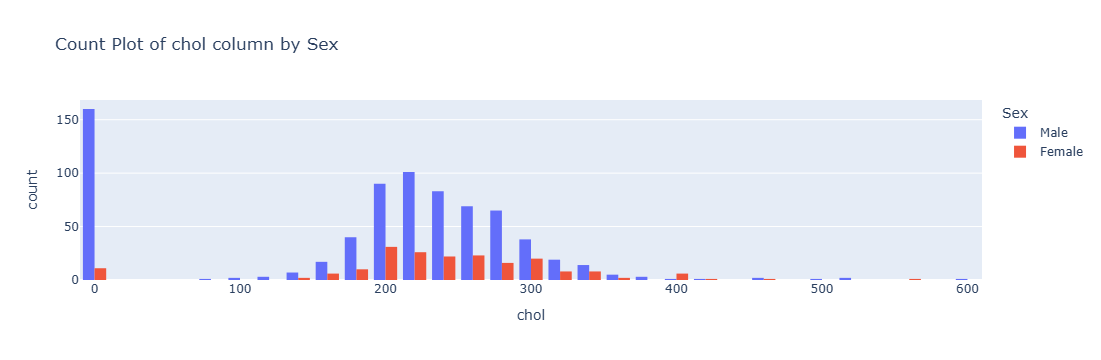

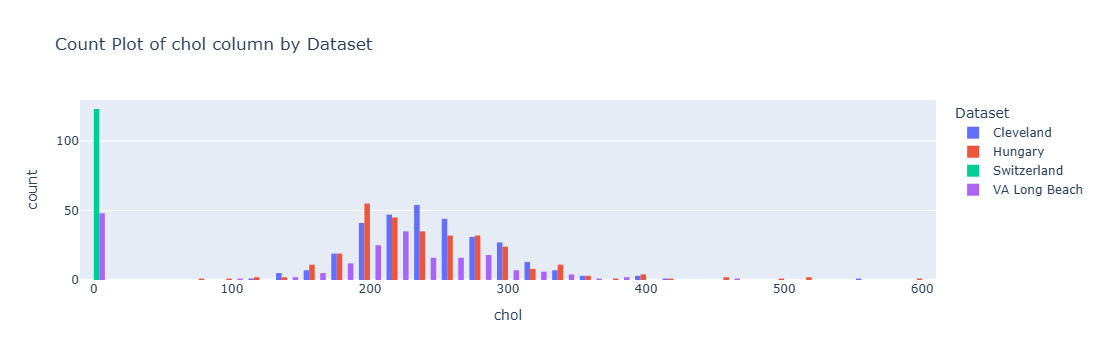

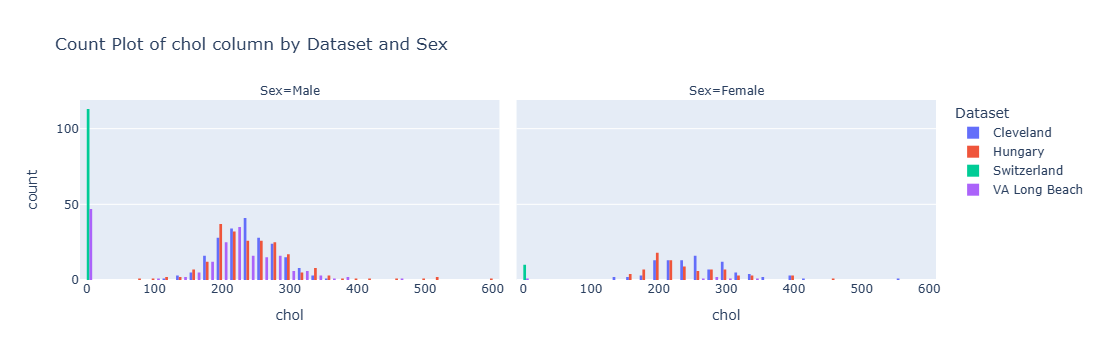

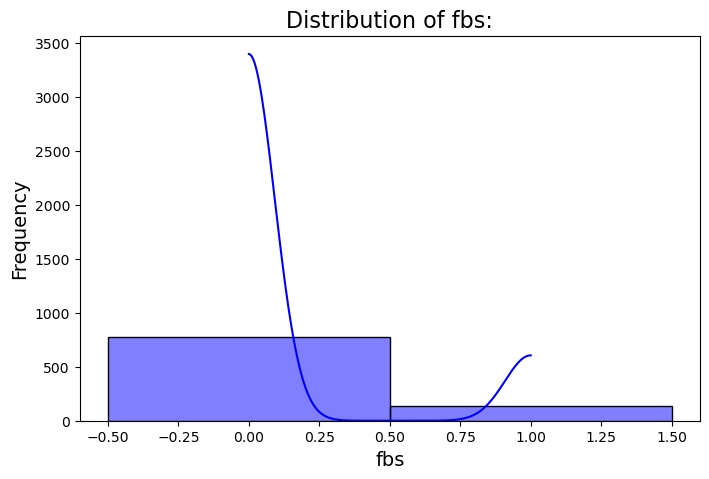

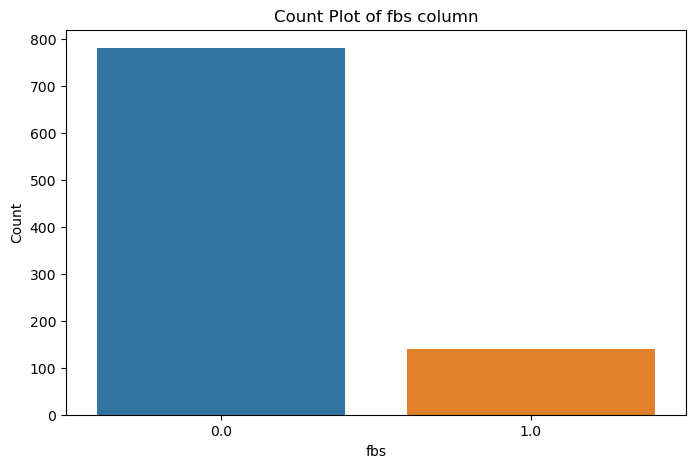

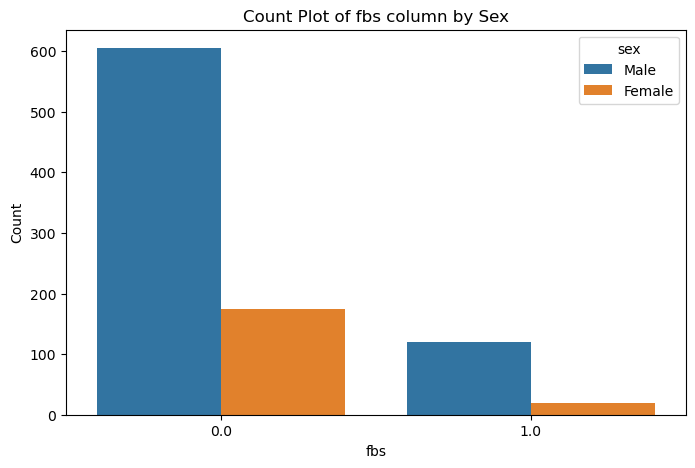

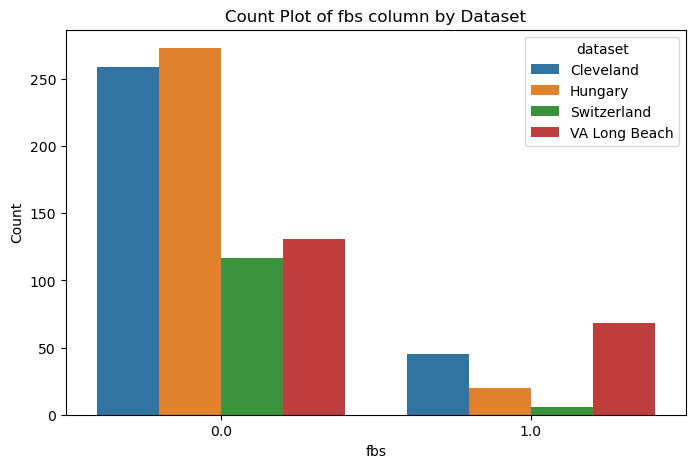

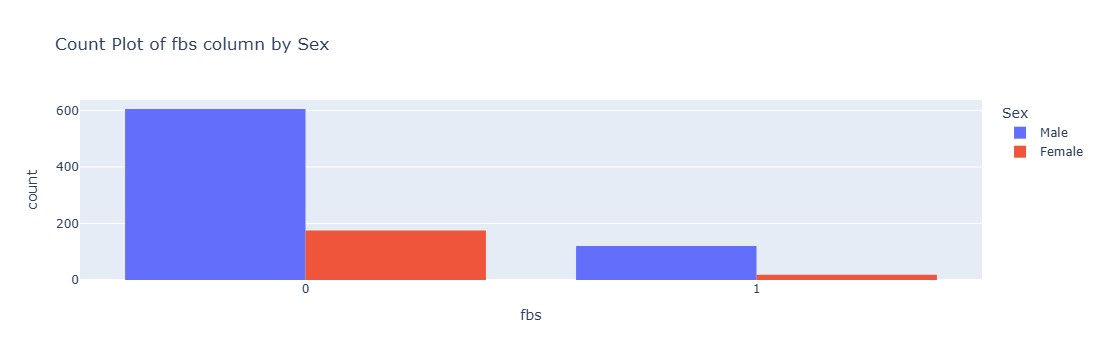

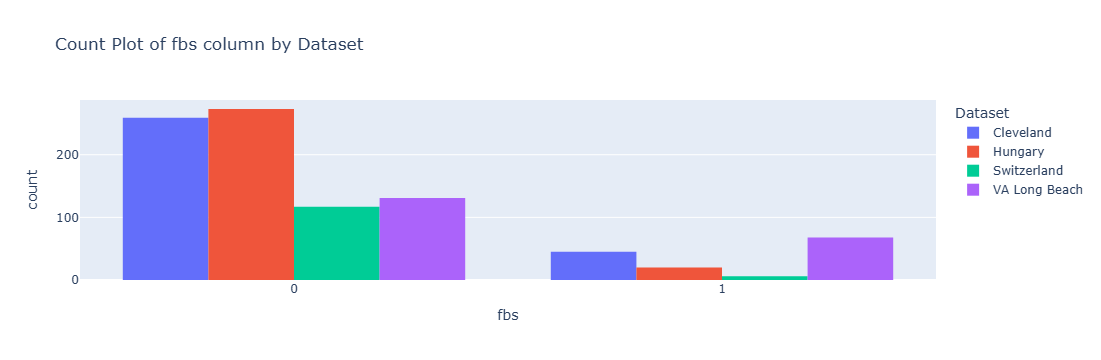

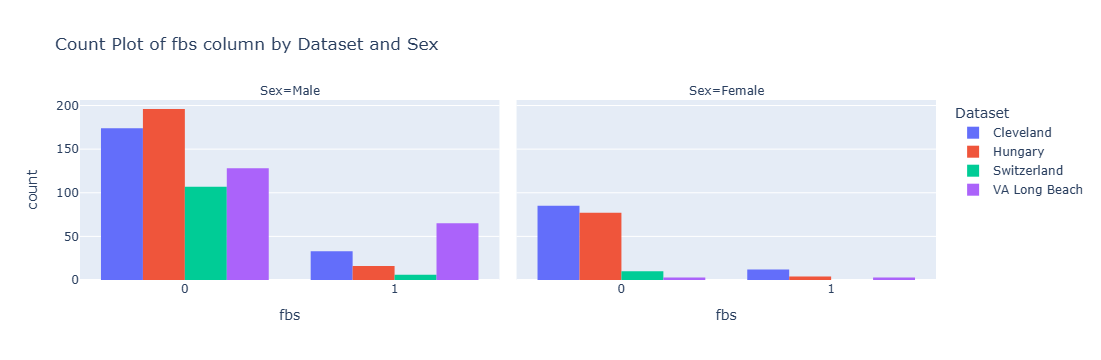

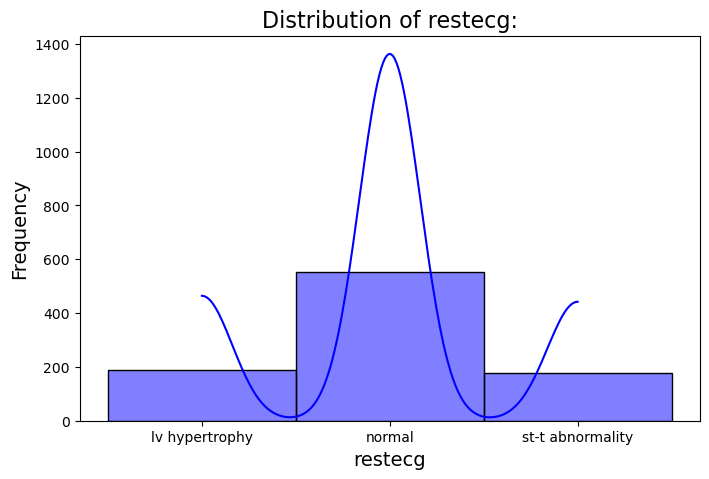

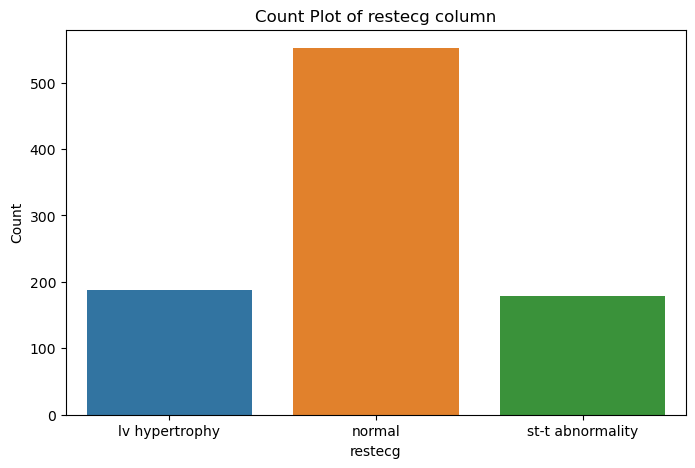

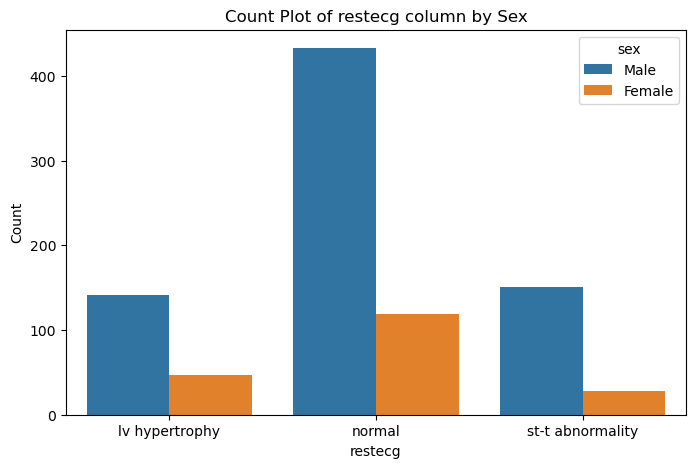

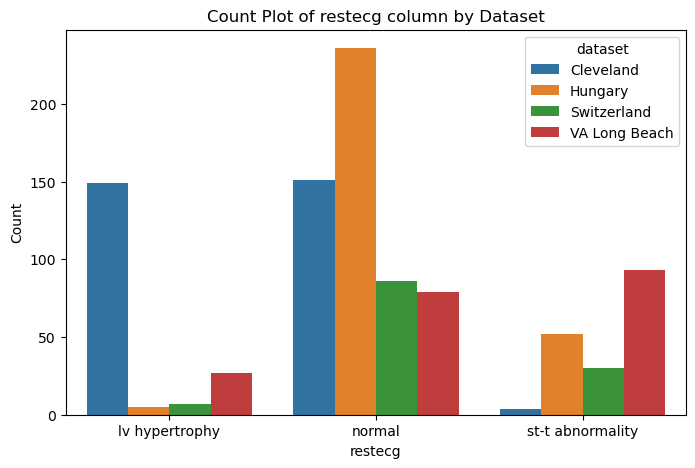

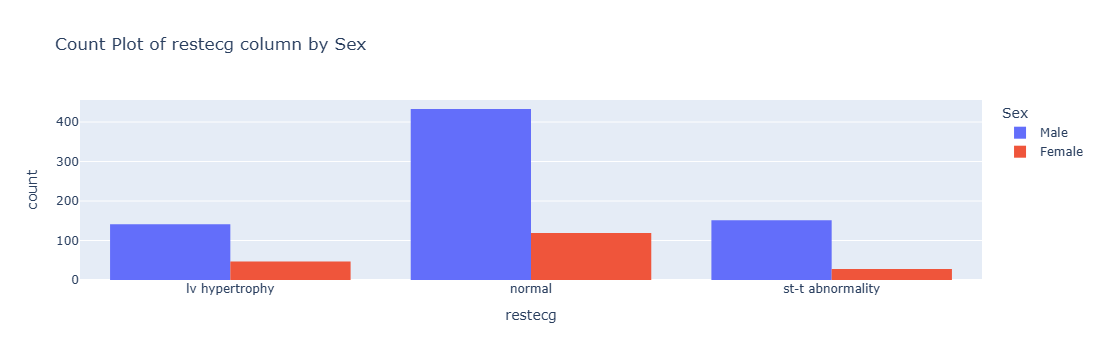

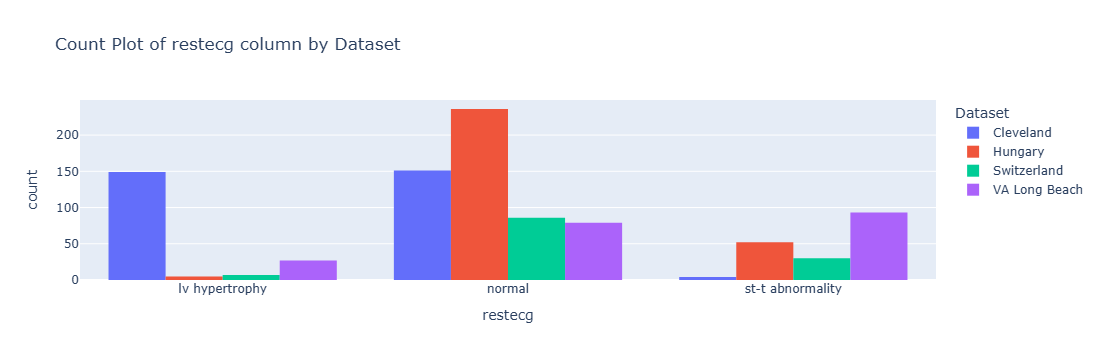

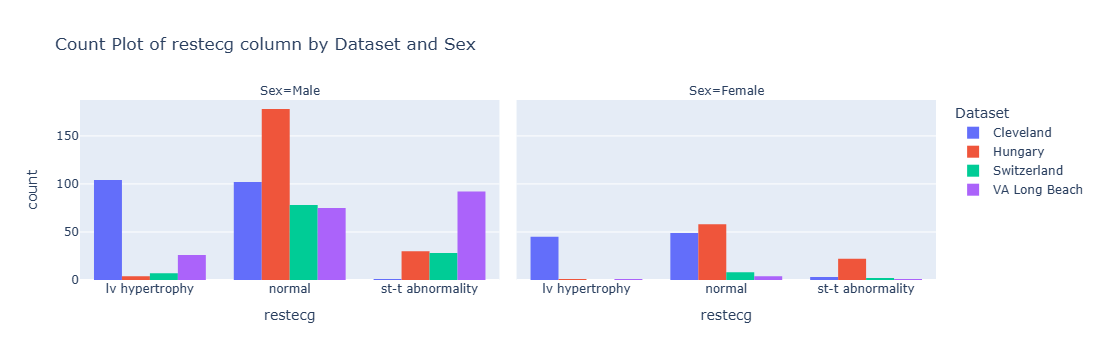

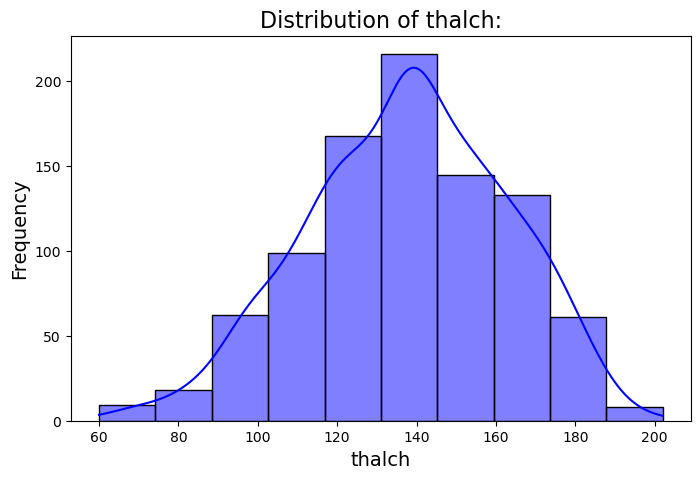

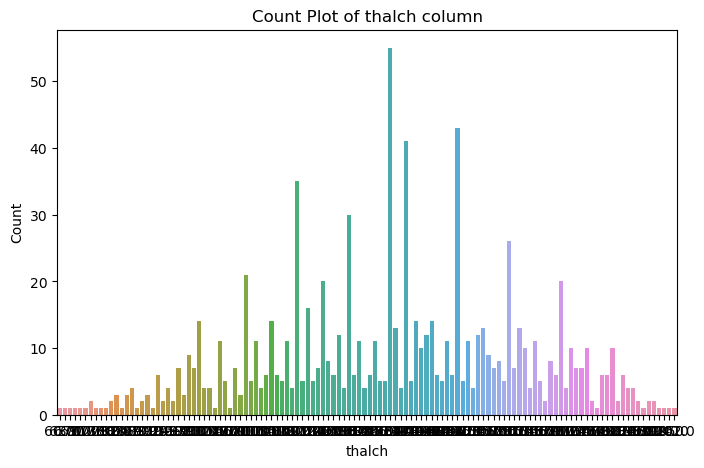

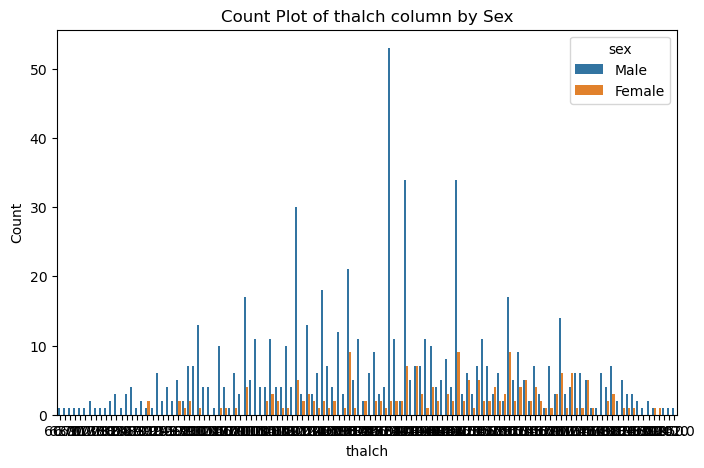

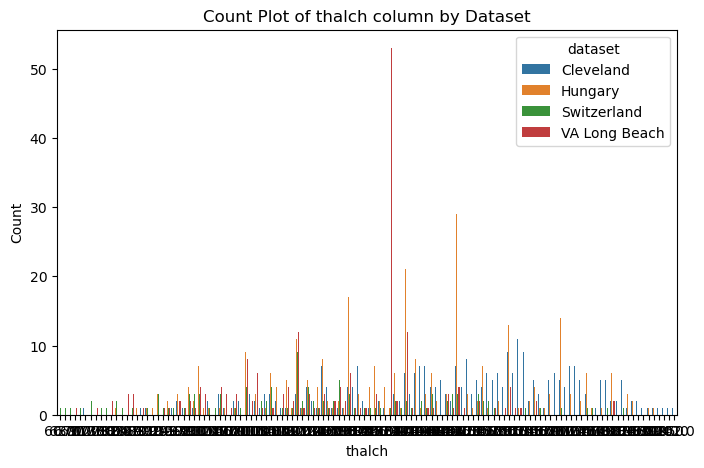

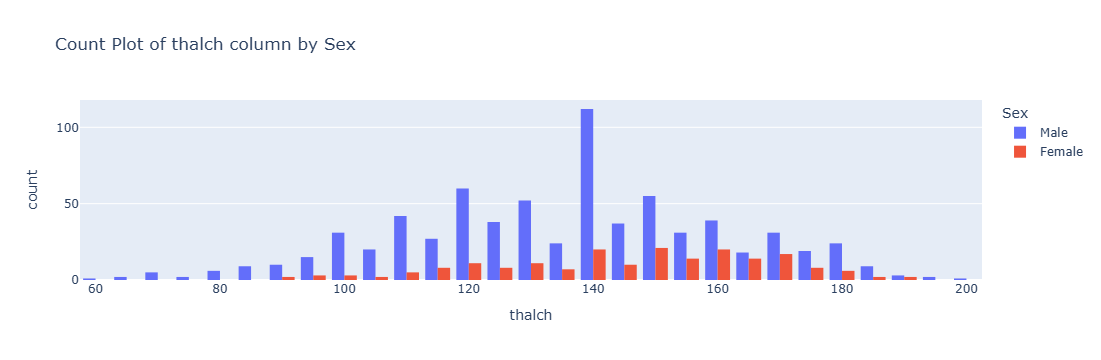

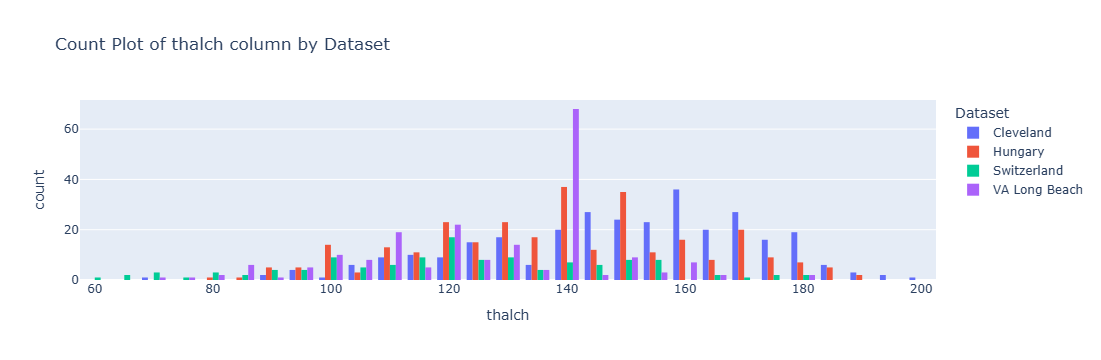

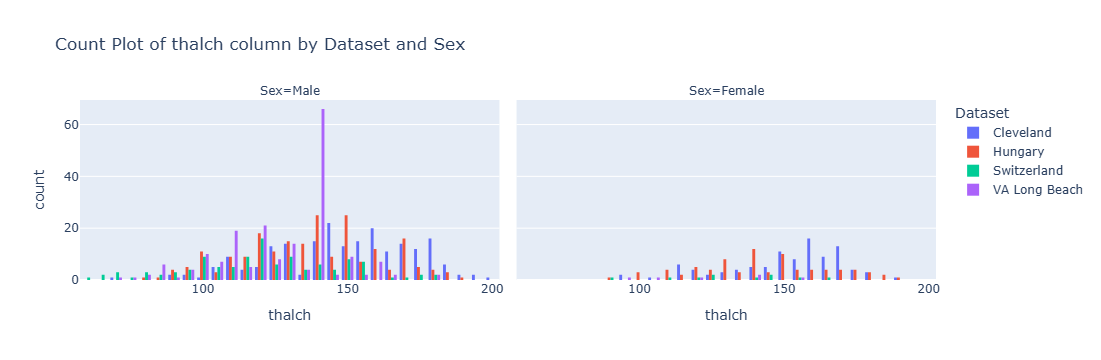

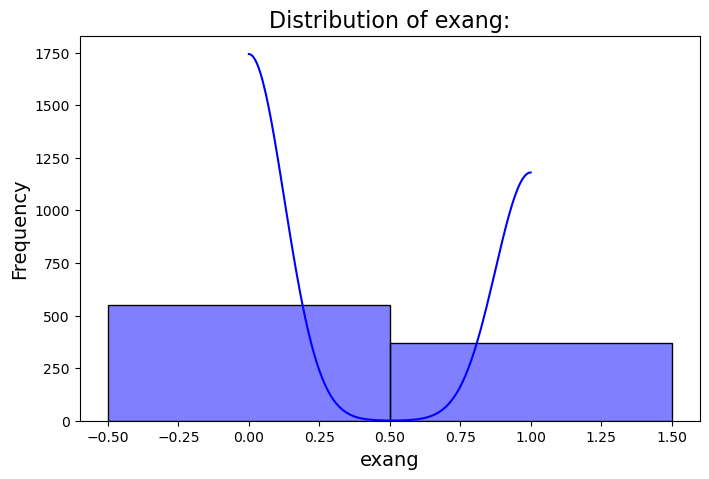

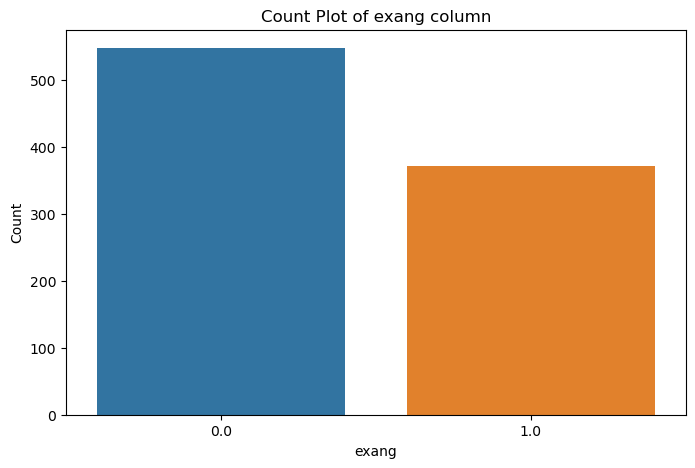

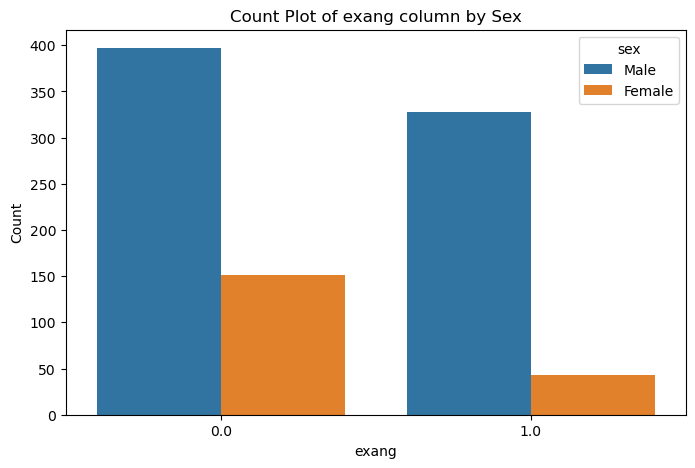

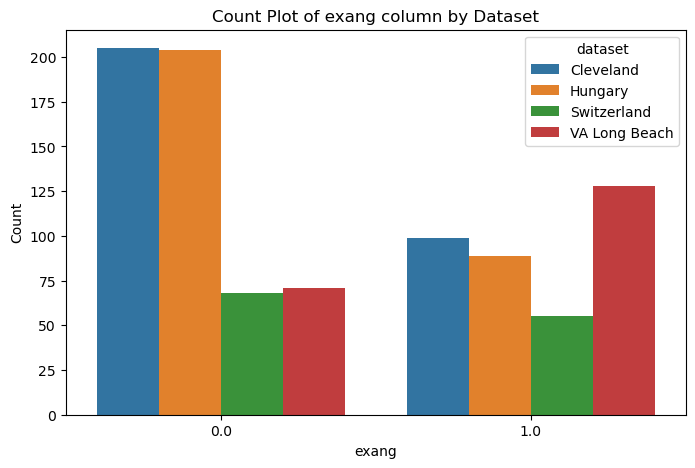

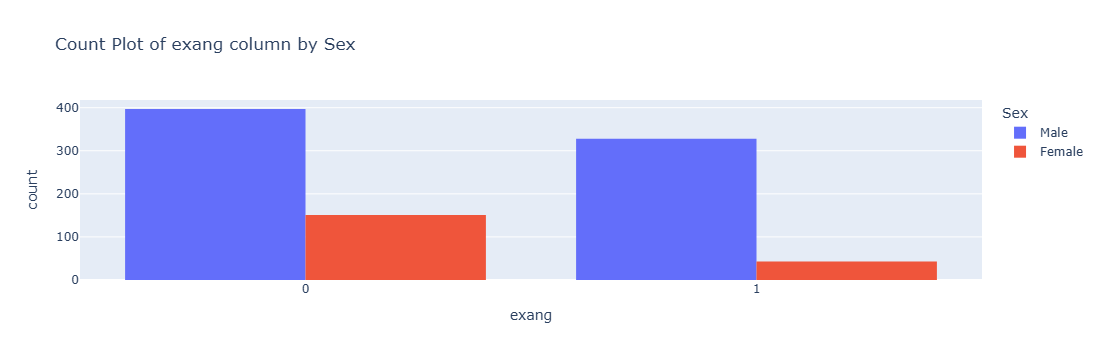

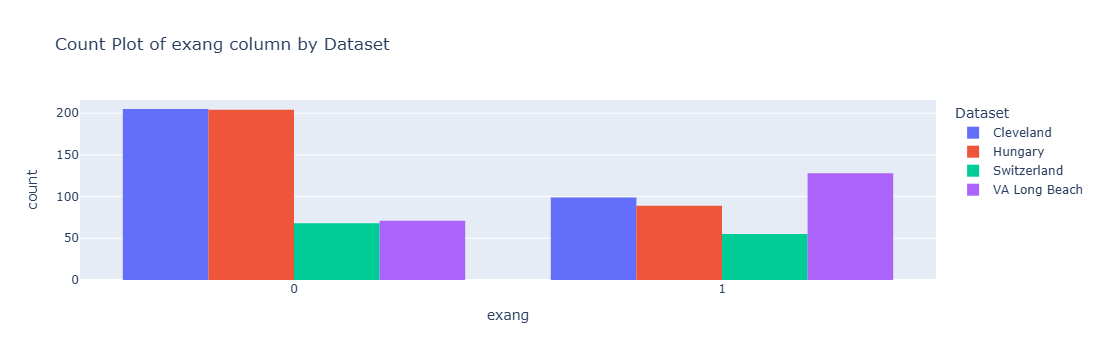

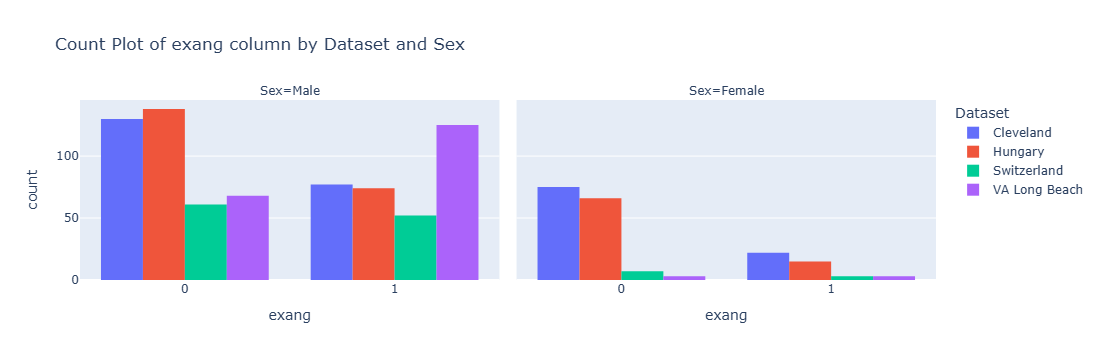

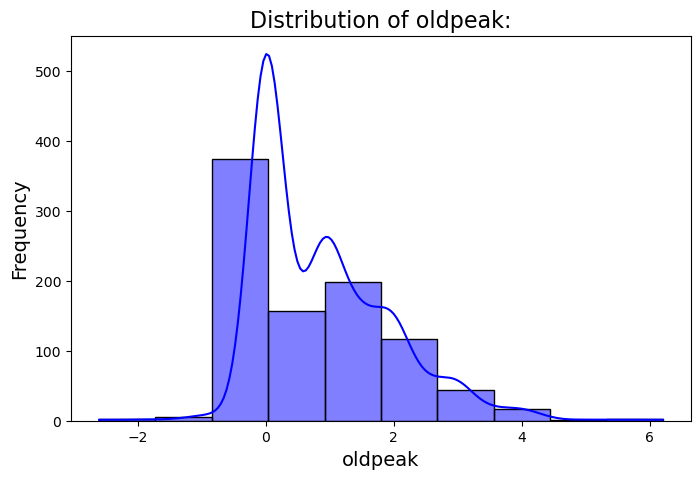

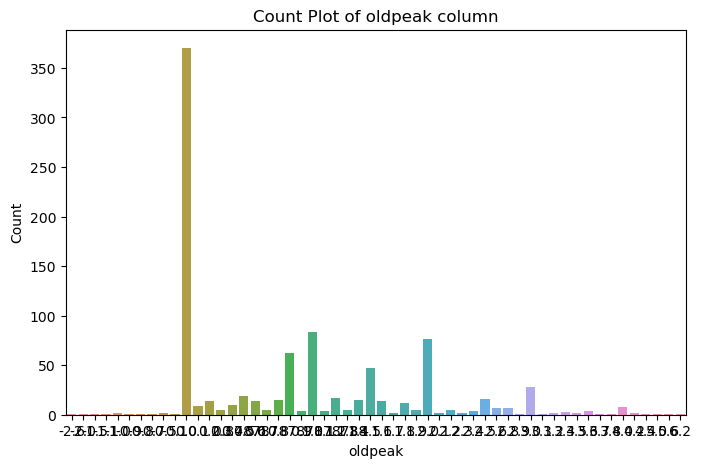

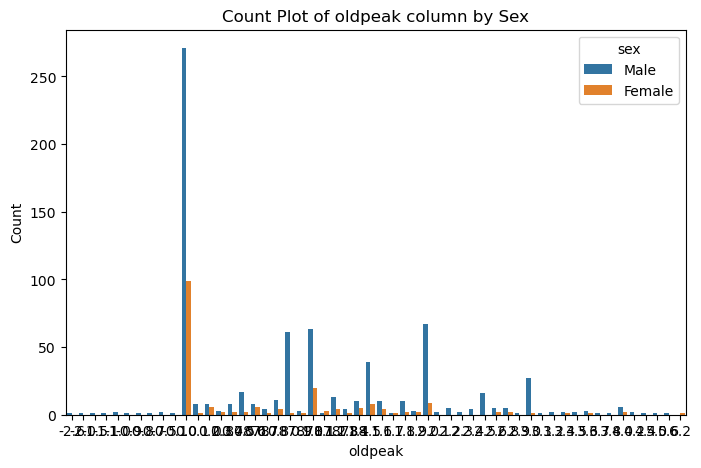

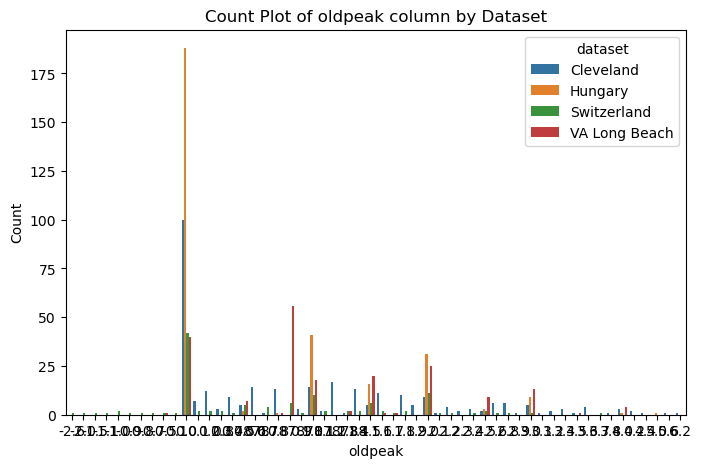

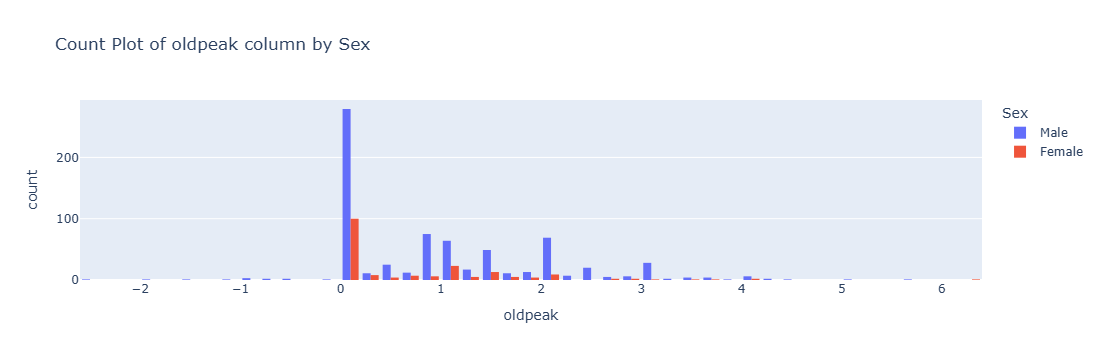

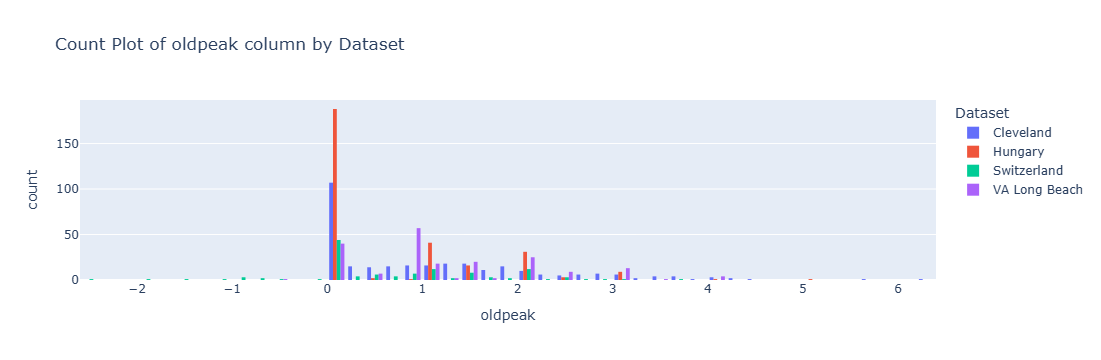

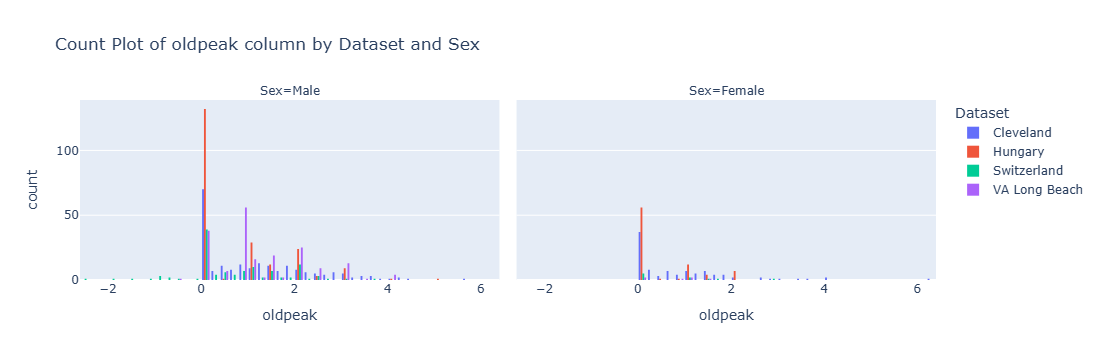

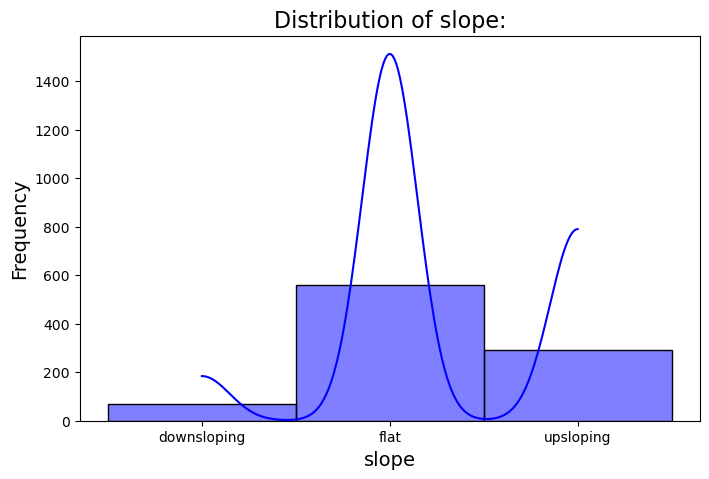

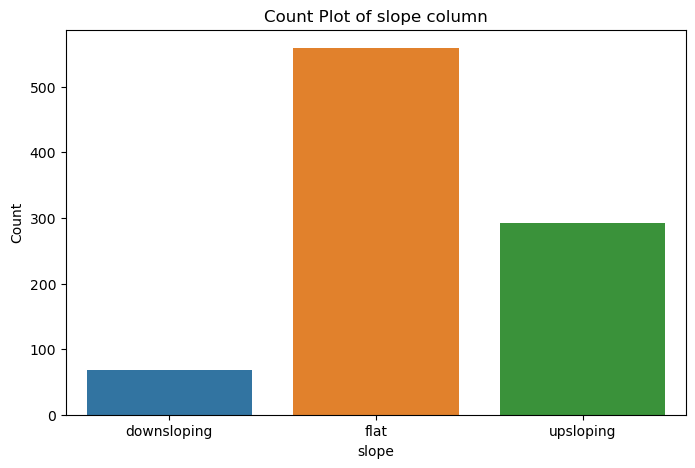

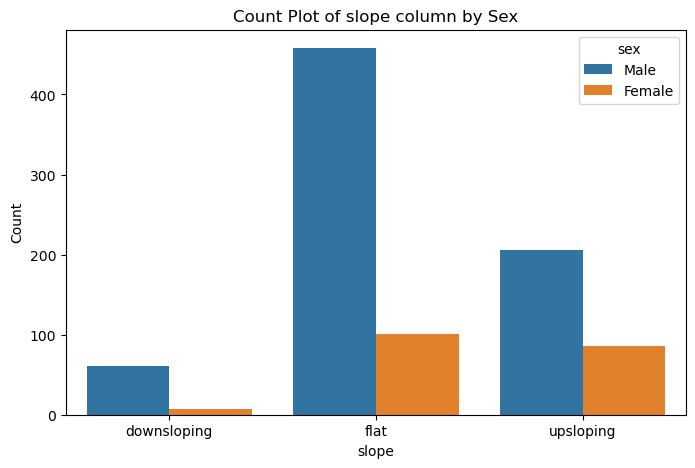

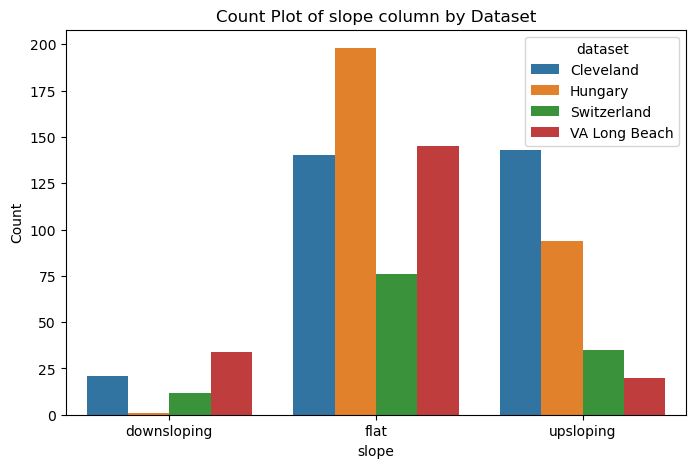

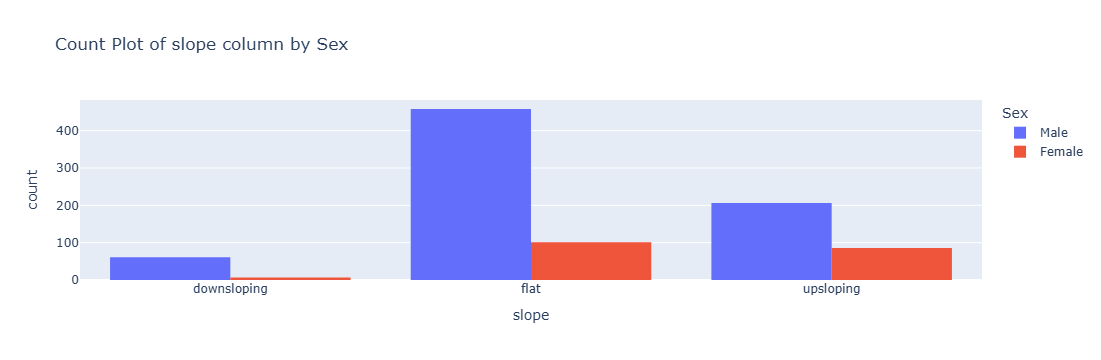

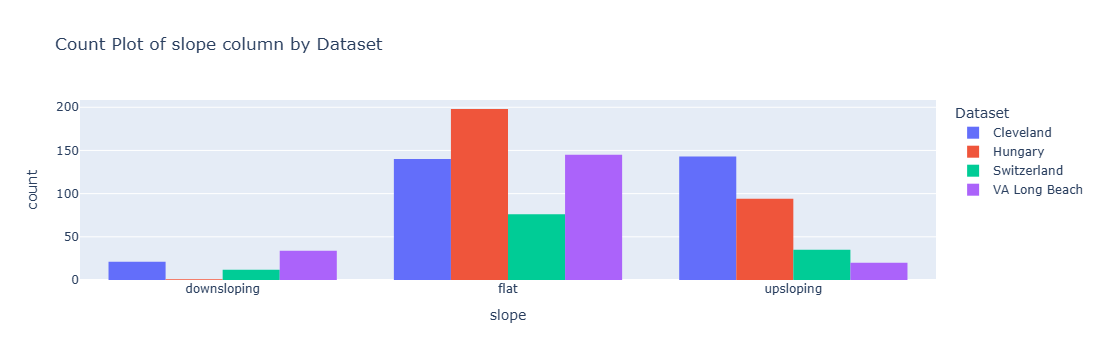

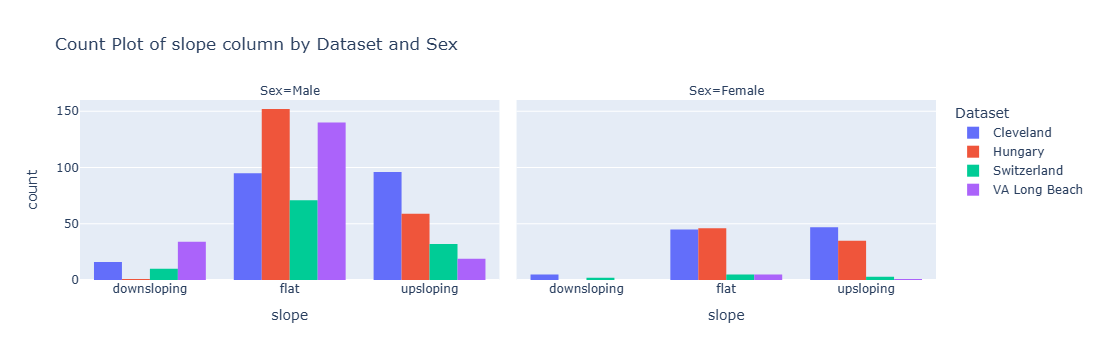

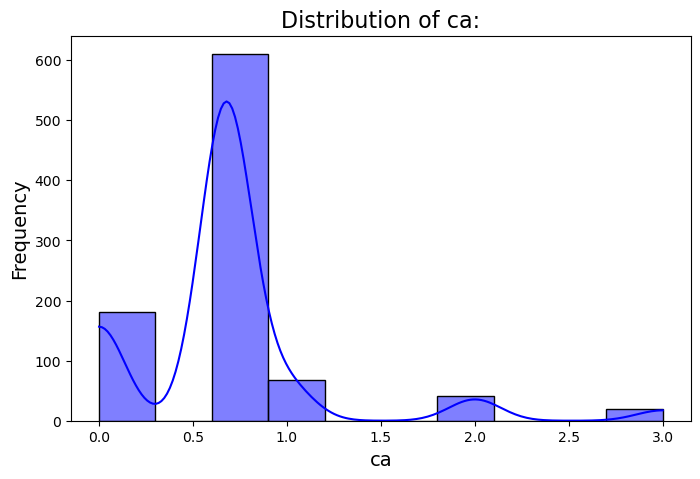

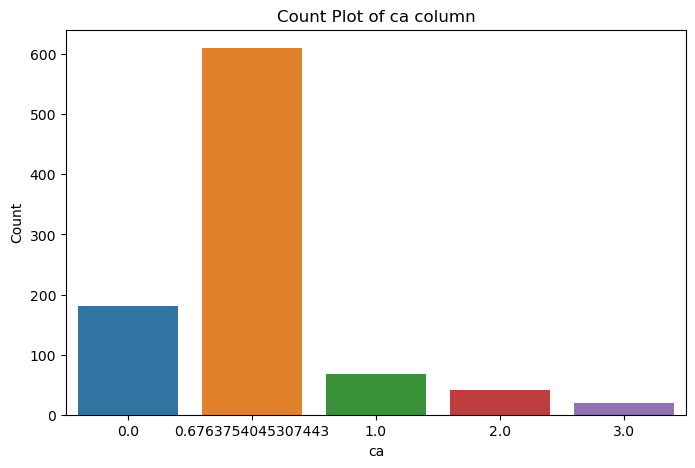

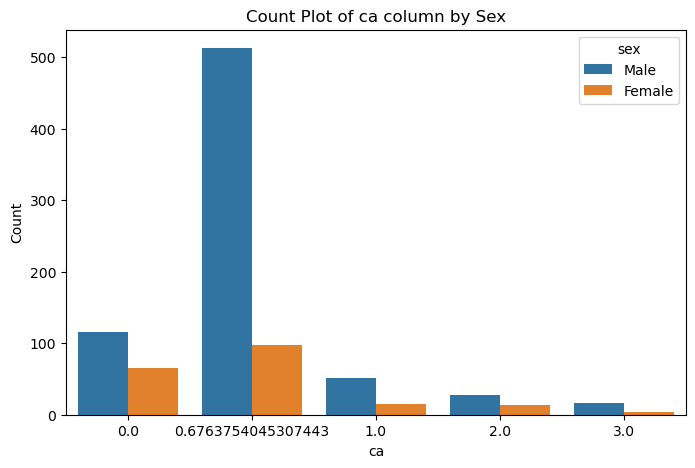

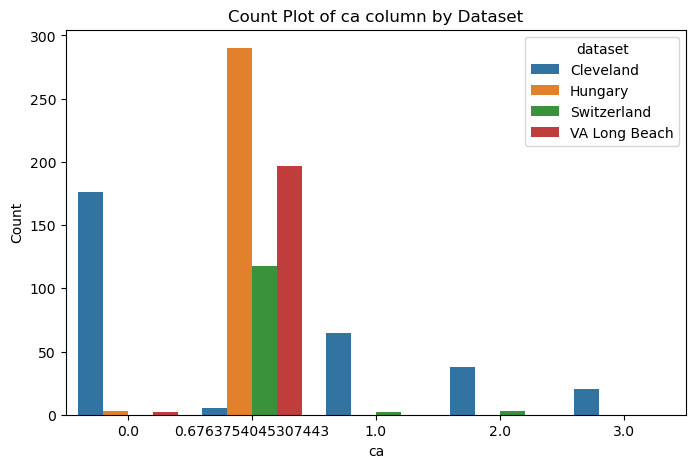

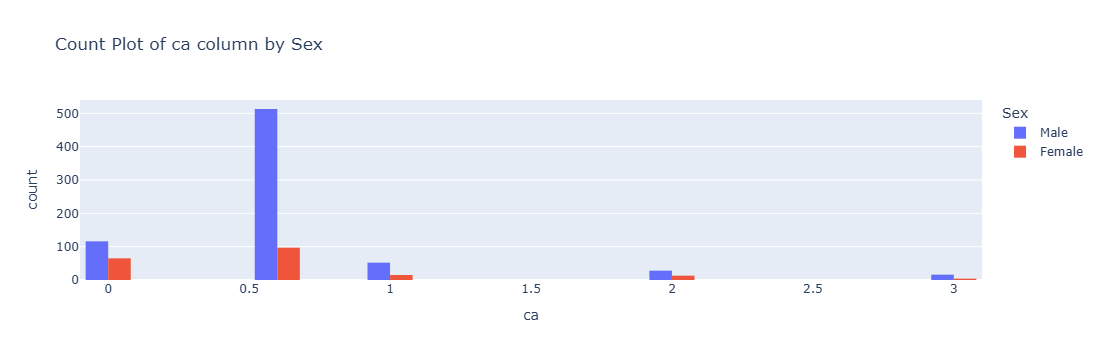

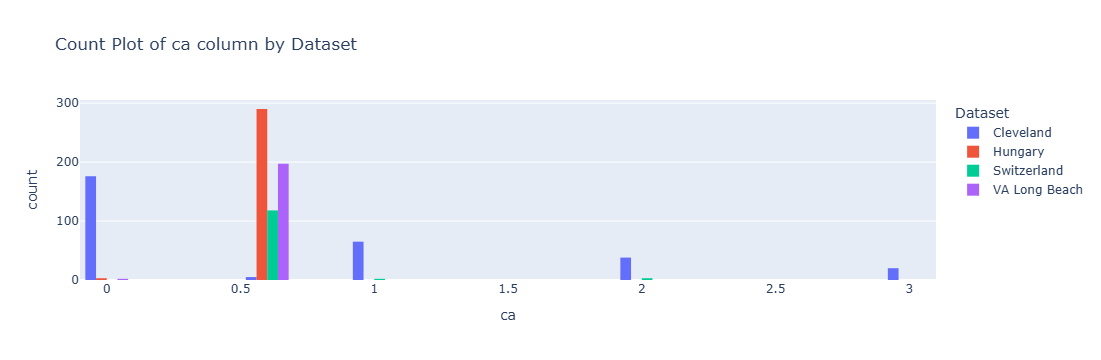

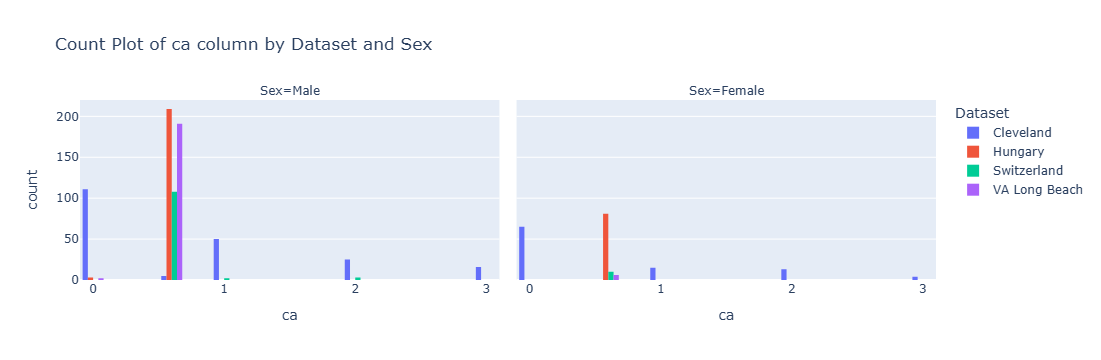

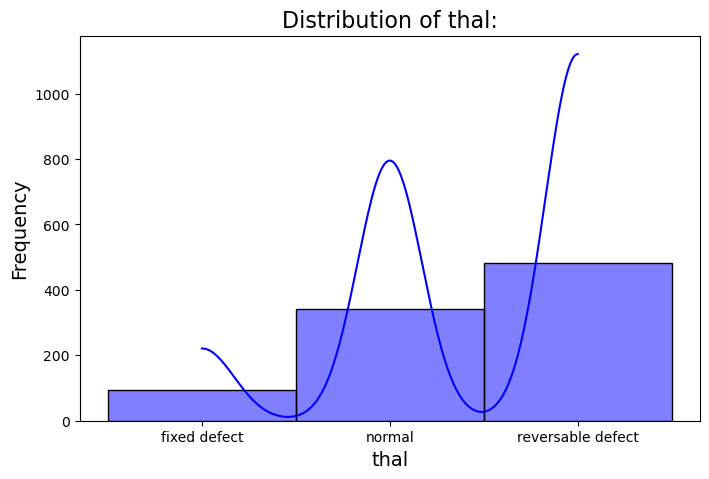

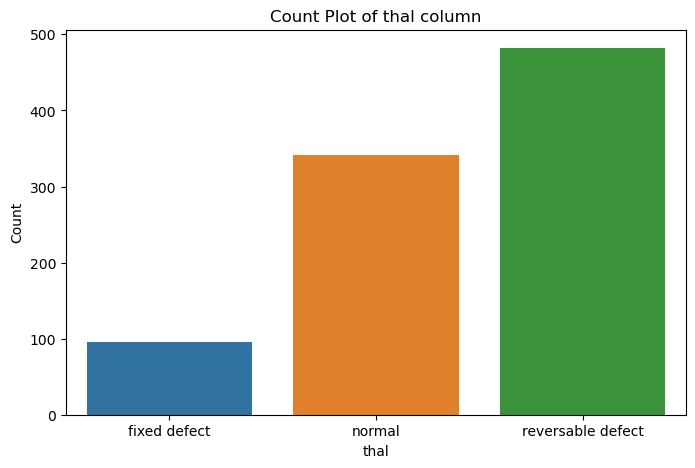

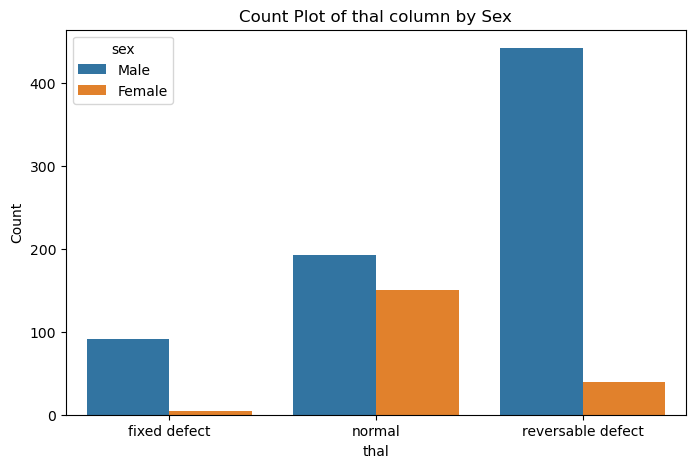

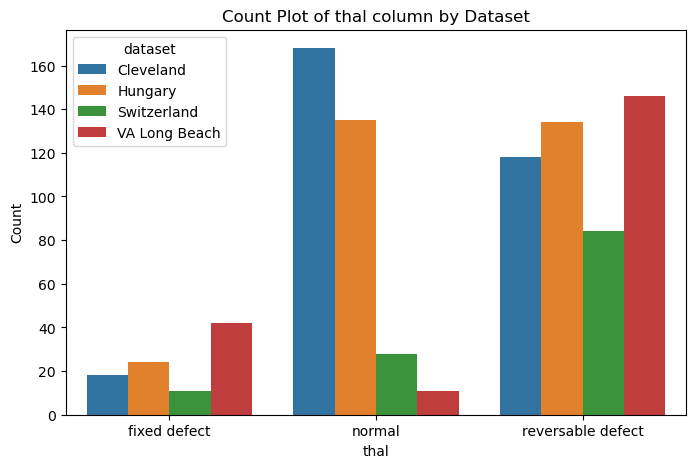

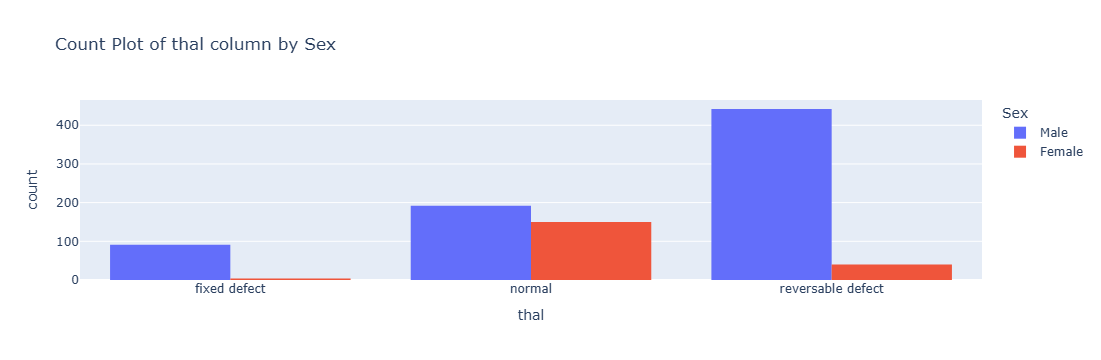

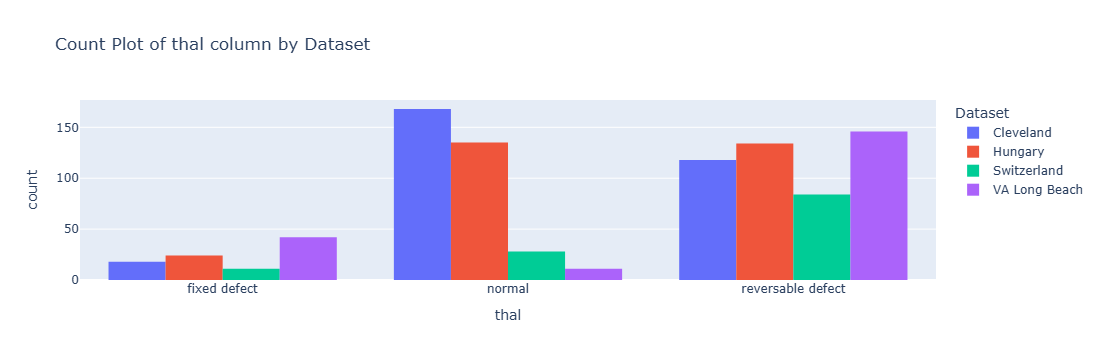

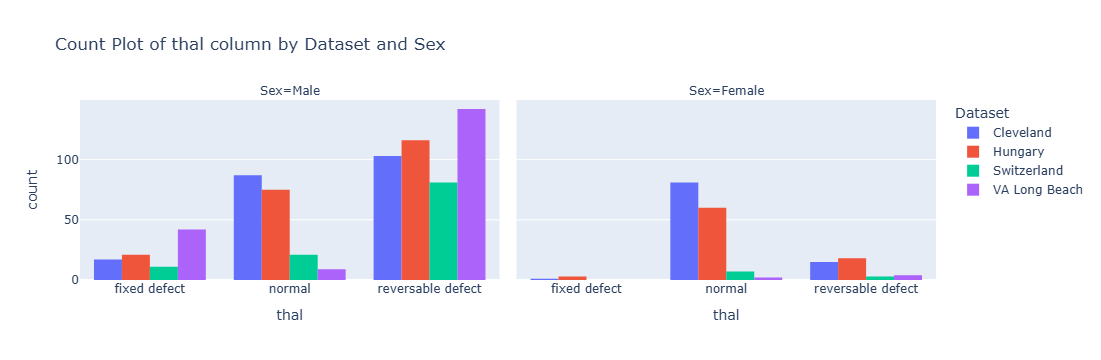

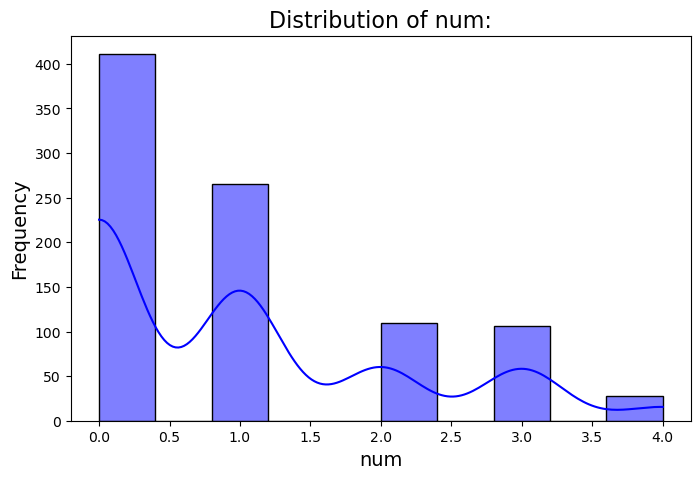

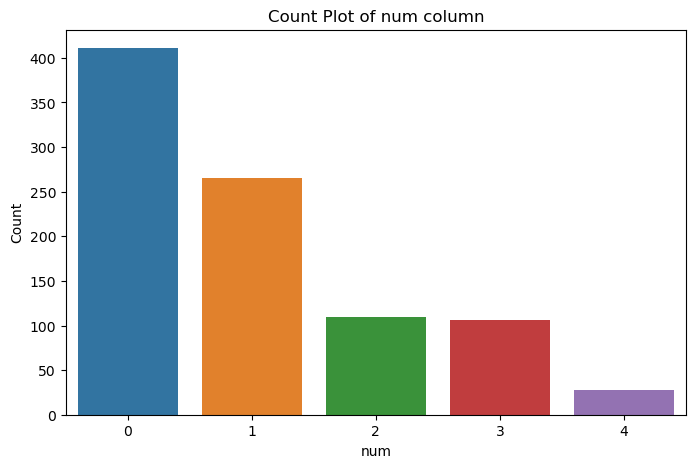

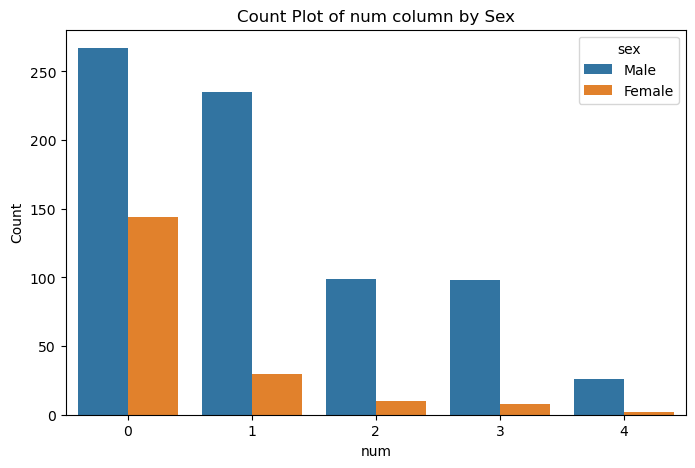

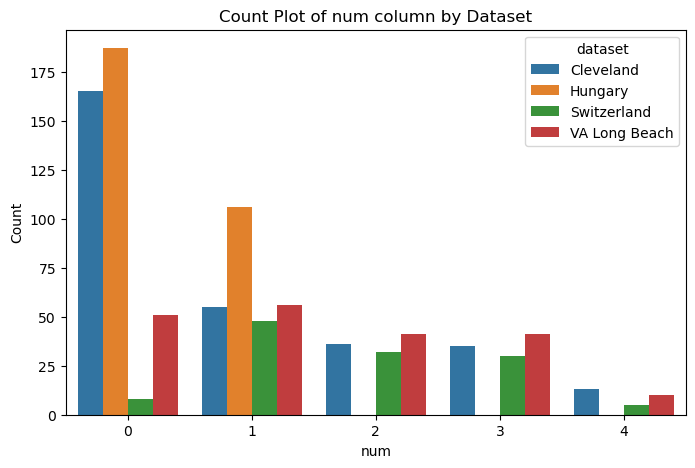

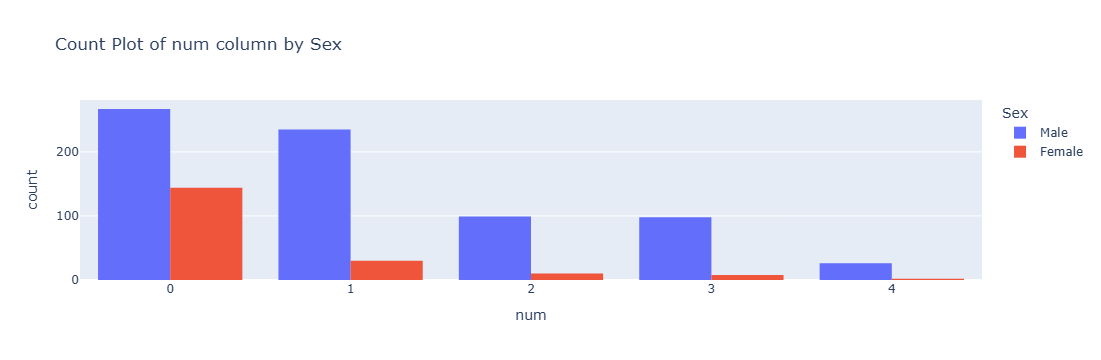

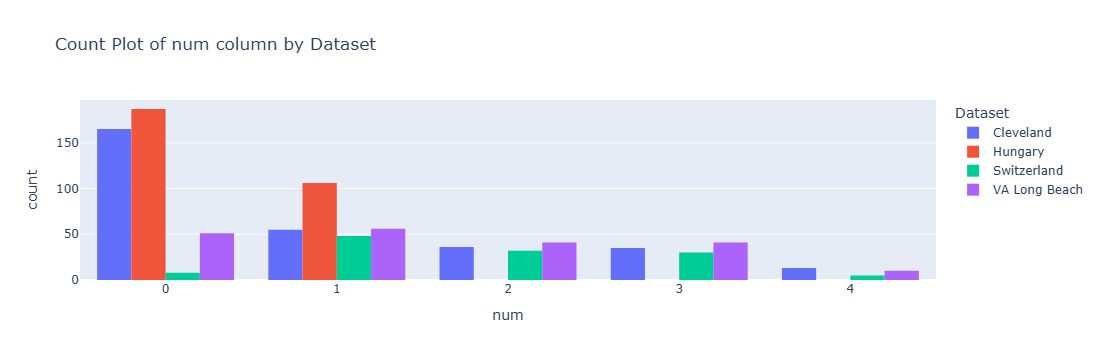

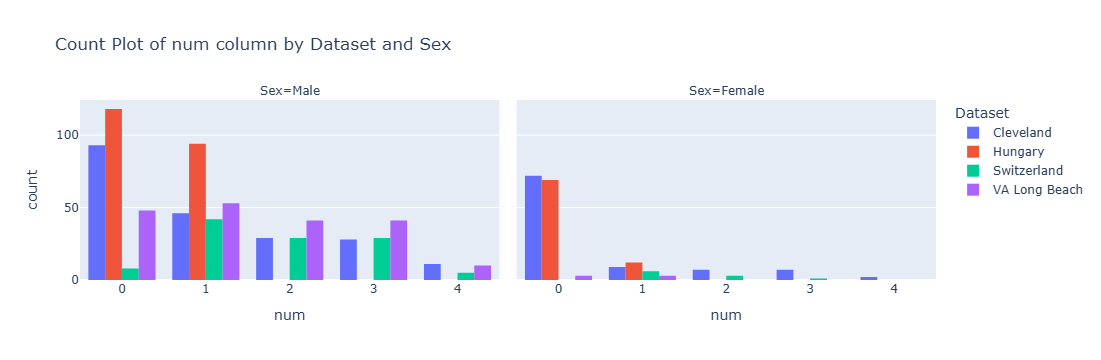

In [96]:

# List of columns to explore
columns_to_plot = ['chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# Loop through each column and create Seaborn and Plotly plots
for col in columns_to_plot:
    # Plot histogram using Seaborn to see distribution of the column
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=10, kde=True, color='blue')  # Use col instead of 'col'
    plt.title(f'Distribution of {col}:', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()
    
    # 1. Seaborn Count Plot without Hue
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col} column')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    
    # 2. Seaborn Count Plot with Hue='sex'
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, hue='sex')
    plt.title(f'Count Plot of {col} column by Sex')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    
    # 3. Seaborn Count Plot with Hue='dataset'
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, hue='dataset')
    plt.title(f'Count Plot of {col} column by Dataset')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    # 4. Plotly Histogram with Color='sex'
    fig = px.histogram(df, x=col, color='sex', 
                       title=f'Count Plot of {col} column by Sex',
                       labels={col: col, 'sex': 'Sex'},
                       barmode='group')  # Use 'group' for side-by-side bars
    fig.show()

    # 5. Plotly Histogram with Color='dataset'
    fig = px.histogram(df, x=col, color='dataset', 
                       title=f'Count Plot of {col} column by Dataset',
                       labels={col: col, 'dataset': 'Dataset'},
                       barmode='group')  # Use 'group' for side-by-side bars
    fig.show()

    # 6. Create a Plotly plot for x=col with color='dataset' and facet_col='sex'
    fig = px.histogram(
        df, 
        x=col,  # Use col instead of 'col'
        color='dataset', 
        title=f'Count Plot of {col} column by Dataset and Sex',
        labels={col: col, 'dataset': 'Dataset', 'sex': 'Sex'},
        barmode='group',  # Use 'group' for side-by-side bars
        facet_col='sex'   # Create separate plots for each 'sex' value
    )

    # Show the plot
    fig.show()

<h1 style="color:Red; font-size:200%; font-weight:bold;">Machine Learning</h1>


In [97]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [99]:
df['num'].value_counts()  #num is predicted attribute

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

In [102]:
# here 0,1,2,3,4, are showing the level of heart disease
# 0 means noo heart disease
# 1 indicates mild level , 2 moderate level , 3 => swear and 4 indicates max ( highest level ) or you can say ' critical' level of having heart disease.

In [103]:
#Split data into X and Y
X = df.drop('num', axis=1)
y= df['num']

In [105]:
#Encode X data using seperate label encoder for all categorical columns and save it for inverse transform
# Step 1: Initialize a dictionary to hold the encoders
label_encoders = {}

# Step 2: Encode categorical columns and save the encoders
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le  # Save the encoder for inverse transformation

# Now X is encoded
print("Encoded DataFrame:")
print(X)

# Step 3: Perform inverse transformation
for col in label_encoders:
    X[col] = label_encoders[col].inverse_transform(X[col])

# Now X is back to its original form
print("\nDataFrame after inverse transformation:")
print(X)

Encoded DataFrame:
      id  age  sex  dataset  cp    trestbps   chol  fbs  restecg      thalch  \
0      1   63    1        0   3  145.000000  233.0  1.0        0  150.000000   
1      2   67    1        0   0  160.000000  286.0  0.0        0  108.000000   
2      3   67    1        0   0  120.000000  229.0  0.0        0  129.000000   
3      4   37    1        0   2  130.000000  250.0  0.0        1  187.000000   
4      5   41    0        0   1  130.000000  204.0  0.0        0  172.000000   
..   ...  ...  ...      ...  ..         ...    ...  ...      ...         ...   
915  916   54    0        3   0  127.000000  333.0  1.0        2  154.000000   
916  917   62    1        3   3  132.132404  139.0  0.0        2  137.545665   
917  918   55    1        3   0  122.000000  223.0  1.0        2  100.000000   
918  919   58    1        3   0  132.132404  385.0  1.0        0  137.545665   
919  920   62    1        3   1  120.000000  254.0  0.0        0   93.000000   

     exang   oldpeak

In [106]:
#Split the data into train test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 , random_state=42 )

In [113]:
# Import all the classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier  
from xgboost import XGBClassifier
from catboost import CatBoostClassifier  # If you are using CatBoost

#Import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score


In [109]:
!pip install lightgbm


[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [152]:

# create a function to train and evaluate all the models and select the best one 

# Function to encode categorical columns
# Encode categorical columns
def encode_categorical_columns(X):
    label_encoders = {}
    for column in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le
    return X, label_encoders

# Impute missing values
def impute_missing_values(X):
    imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of the column
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    return X

# Define function to train and evaluate models
def train_and_evaluate_models(X, y):
    classifiers = {
        'Logistic Regression': LogisticRegression(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Support Vector Classifier': SVC(),
        'Naive Bayes': GaussianNB(),
        'XGBoost': XGBClassifier()
    }
    
    best_model_name = None
    best_model = None
    best_model_metrics = None
    best_cv_score = -np.inf

    # Train and evaluate each model
    for name, model in classifiers.items():
        # Cross-validation accuracy
        cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
        cv_accuracy = np.mean(cv_scores)
        print(f"{name} - Cross-validation accuracy: {cv_accuracy:.4f}")

        # Update best model if needed
        if cv_accuracy > best_cv_score:
            best_cv_score = cv_accuracy
            best_model_name = name
            best_model = model
            best_model_metrics = cv_scores

    # Train the best model on the entire dataset
    best_model.fit(X, y)
    
    return best_model_name, best_model, best_model_metrics

# Main workflow
def main():
    # Load your dataset
    df = pd.read_csv('heart_disease_uci[1].csv')

    # Check the first few rows of the dataset
    print(df.head())

    # Prepare features and labels
    X = df.drop(columns=['num'])  # Features
    y = df['num']  # Target variable

    # Step 1: Encode categorical columns if any
    X, label_encoders = encode_categorical_columns(X)

    # Step 2: Handle missing values by imputing
    X = impute_missing_values(X)

    # Step 3: Train and evaluate models
    best_model_name, best_model, best_model_metrics = train_and_evaluate_models(X, y)

    # Print the best model and its metrics
    print(f"\nBest Model: {best_model_name}")
    print(f"Best Model Cross-validation Scores: {best_model_metrics}")
    print(f"Best Model Accuracy: {np.mean(best_model_metrics):.4f}")

# Run the complete code
if __name__ == "__main__":
    main()


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
Logistic

In [153]:
# Save the best model using pickle
import pickle

# Assuming 'best_model' is the model we trained and want to save
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'.")


Best model saved as 'best_model.pkl'.


In [155]:
# Load the saved model
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use 'loaded_model' for predictions
# Example: if X_test is your test data
# y_pred = loaded_model.predict(X_test)

print("Model loaded successfully.")


Model loaded successfully.



# Heart Disease Data Analysis

## **Output:**

### **1. Age Analysis**
- The minimum age to have heart disease is **27 years**, and the maximum is **77 years**.
- Most people get heart disease between the ages of **52 to 54 years**.

### **2. Gender Distribution**
- **Male percentage:** **78.91%**  
- **Female percentage:** **21.09%**  
- **Males are 274.23% more than females** in the dataset.

### **3. Regional Distribution**
- **Highest number of people** are from **Cleveland (304)**.
- **Lowest number of people** are from **Switzerland (123)**.
- **Highest number of females** are in **Cleveland (97)**.
- **Lowest number of females** are in **VA Long Beach (6)**.
- **Highest number of males** are in **Hungary (212)**.
- **Lowest number of males** are in **Switzerland (113)**.

### **4. Mean, Median, and Mode Observations**
- Mean, median, and mode of every country **differ with respect to age**.

### **5. Chest Pain Analysis**
- **426 Males** and **70 Females** are suffering from **asymptomatic chest pain disease**.
- The **highest number of patients (144)** belong to **Cleveland**.
- **36 Males** and **10 Females** are suffering from **typical angina**.
- It is concluded that **a smaller number of people suffer from typical angina** compared to other heart diseases.

### **6. Handling Missing Values**
- Missing values in **thal (thalassemia), slope, fbs, exang, and restecg** columns were imputed using a **Random Forest Classifier**.
- There are **30 missing values in the 'chol' column**, but rows where **chol == 0** are **not related to missing values**, so no changes were made.
- **Chol == 0** is **not considered an outlier**.

---

# **Observations on Normal Distribution and Skewness**

## **Normally Distributed Data**

### **Restops**
- **Males:** The observed range is **127.5 - 138.4**, with a count of **165**.
- **Females:** The observed range is **127.5 - 132.4**, with a count of **39**.

### **Other Observations**
- **Females:** Range **197.5 - 202.4** (Count: **6**).
- **Males:** Range **197.5 - 202.4** (Count: **2**).
- **Coconuts (Males):** Range **77.5 - 82.4** (**Lowest observed values**).
- **No females** were observed in this range.

### **Regional Data**
- **VA Long Beach:** Males observed in the range **127.5 - 132.4** (Count: **77**).
- **Hungary:** Females observed in the range **117.5 - 122.4** (Count: **21**).

---

## **Skewed Data (Cholesterol - "Chol")**

### **Chad (Skewed Distribution)**
- **Males:** Range **210 - 229**, with a count of **101** (**Largest group**).
- **Females:** Range **190 - 209**, with a count of **31**.
- **Cleveland:** Males (**Count: 41**) are suffering from **high cholesterol**.
- **Hungary:**  
  - **Females (Count: 8)** fall within the **190 - 207** range.
  - Others fall within the **230 - 249** range.

---

## **Highly Skewed Data (Fasting Blood Sugar - "fbs")**

### **Hungary**
- **Males (Count: 196)** are suffering from **high fasting blood sugar**.

### **VA Long Beach**
- **Males (Count: 65)** observed with **0 fbs**.

### **Switzerland**
- **Males (Count: 1)** observed with **2 fbs**.
- **Males (Count: 107)** observed with **0 fbs**.

---

# **Additional Observations on Distribution**

## **Restecg (Resting Electrocardiographic Measurement)**
- The data is **normally distributed**.
- **Normal ecg rate:** **high**.

### **Hungary**
- **Males:** **778 individuals**.
- **Females:** **58 individuals**.

---

## **Thalch (Thalassemia)**
- The data is **slightly skewed**.

### **Long Beach**
- **Males:** **66 individuals**, with values around **137.5 to 142.4**.

### **Uotewland**
- **Females:** **16 individuals**, with values ranging from **157.5 to 162.4**.

---

## **Exang (Exercise-Induced Angina)**
- The data is **highly skewed**.

### **Hungary**
- **Males:** **138 individuals**, with **0 exang**.

### **Cleveland**
- **Females:** **75 individuals**, with **0 exang**.

### **Long Beach**
- **Males:** **125 individuals**, with **1 exang**.

### **Cleveland**
- **Females:** **22 individuals**, with values within a **1 exang**.
